In [3]:
import numpy as np
from sklearn import tree
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import pandas as pd
import sys
from copy import copy, deepcopy
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
titanic = sns.load_dataset('titanic')
columns_num = ['survived','pclass','age','sibsp','parch','fare']
columns_str = ['sex','embarked','class','who','adult_male','deck','embark_town','alive','alone']
titanic.drop('alive', inplace=True, axis=1)
columns_str.remove('alive')

titanic['alone'] = titanic['alone'].astype('int64')
titanic['adult_male'] = titanic['adult_male'].astype('int64')


#print(titanic[columns_str + columns_num])
titanic

survived  pclass     sex    age  sibsp  parch      fare embarked   class  \
0           0       3    male  22.00      1      0    7.2500        S   Third   
1           1       1  female  38.00      1      0   71.2833        C   First   
2           1       3  female  26.00      0      0    7.9250        S   Third   
3           1       1  female  35.00      1      0   53.1000        S   First   
4           0       3    male  35.00      0      0    8.0500        S   Third   
5           0       3    male    NaN      0      0    8.4583        Q   Third   
6           0       1    male  54.00      0      0   51.8625        S   First   
7           0       3    male   2.00      3      1   21.0750        S   Third   
8           1       3  female  27.00      0      2   11.1333        S   Third   
9           1       2  female  14.00      1      0   30.0708        C  Second   
10          1       3  female   4.00      1      1   16.7000        S   Third   
11          1       1  female  58.00      0      0   26.5500        S   First   
12          0       3    male  20.00      0      0    8.0500        S   Third   
13          0       3    male  39.00      1      5   31.2750        S   Third   
14          0       3  female  14.00      0      0    7.8542        S   Third   
15          1       2  female  55.00      0      0   16.0000        S  Second   
16          0       3    male   2.00      4      1   29.1250        Q   Third   
17          1       2    male    NaN      0      0   13.0000        S  Second   
18          0       3  female  31.00      1      0   18.0000        S   Third   
19          1       3  female    NaN      0      0    7.2250        C   Third   
20          0       2    male  35.00      0      0   26.0000        S  Second   
21          1       2    male  34.00      0      0   13.0000        S  Second   
22          1       3  female  15.00      0      0    8.0292        Q   Third   
23          1       1    male  28.00      0      0   35.5000        S   First   
24          0       3  female   8.00      3      1   21.0750        S   Third   
25          1       3  female  38.00      1      5   31.3875        S   Third   
26          0       3    male    NaN      0      0    7.2250        C   Third   
27          0       1    male  19.00      3      2  263.0000        S   First   
28          1       3  female    NaN      0      0    7.8792        Q   Third   
29          0       3    male    NaN      0      0    7.8958        S   Third   
30          0       1    male  40.00      0      0   27.7208        C   First   
31          1       1  female    NaN      1      0  146.5208        C   First   
32          1       3  female    NaN      0      0    7.7500        Q   Third   
33          0       2    male  66.00      0      0   10.5000        S  Second   
34          0       1    male  28.00      1      0   82.1708        C   First   
35          0       1    male  42.00      1      0   52.0000        S   First   
36          1       3    male    NaN      0      0    7.2292        C   Third   
37          0       3    male  21.00      0      0    8.0500        S   Third   
38          0       3  female  18.00      2      0   18.0000        S   Third   
39          1       3  female  14.00      1      0   11.2417        C   Third   
40          0       3  female  40.00      1      0    9.4750        S   Third   
41          0       2  female  27.00      1      0   21.0000        S  Second   
42          0       3    male    NaN      0      0    7.8958        C   Third   
43          1       2  female   3.00      1      2   41.5792        C  Second   
44          1       3  female  19.00      0      0    7.8792        Q   Third   
45          0       3    male    NaN      0      0    8.0500        S   Third   
46          0       3    male    NaN      1      0   15.5000        Q   Third   
47          1       3  female    NaN      0      0    7.7500        Q   Third   
48          0       3    male    NaN

In [5]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alone            0
dtype: int64

In [6]:
titanic = titanic.dropna(subset=['embarked','embark_town'])

titanic.drop('deck', inplace=True, axis=1)
columns_str.remove('deck')

columns_num.remove('survived')

titanic['age'] = titanic['age'].fillna(int(np.mean(titanic['age'])))

for i in columns_str:
    if i != 'adult_male' and i != 'alone':
        new = pd.get_dummies(titanic[i], prefix=i)
        titanic.drop(i, inplace=True, axis=1)
        titanic = pd.concat([titanic, new], axis=1)
    
train, validate, test = np.split(titanic.sample(frac=1, random_state=42), [int(.7*len(titanic)), int(.85*len(titanic))])
titanic.isnull().sum()

C:\Users\Orest\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-6-552583dea522>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['age'] = titanic['age'].fillna(int(np.mean(titanic['age'])))


survived                   0
pclass                     0
age                        0
sibsp                      0
parch                      0
fare                       0
adult_male                 0
alone                      0
sex_female                 0
sex_male                   0
embarked_C                 0
embarked_Q                 0
embarked_S                 0
class_First                0
class_Second               0
class_Third                0
who_child                  0
who_man                    0
who_woman                  0
embark_town_Cherbourg      0
embark_town_Queenstown     0
embark_town_Southampton    0
dtype: int64

In [7]:
titanic

survived  pclass    age  sibsp  parch      fare  adult_male  alone  \
0           0       3  22.00      1      0    7.2500           1      0   
1           1       1  38.00      1      0   71.2833           0      0   
2           1       3  26.00      0      0    7.9250           0      1   
3           1       1  35.00      1      0   53.1000           0      0   
4           0       3  35.00      0      0    8.0500           1      1   
5           0       3  29.00      0      0    8.4583           1      1   
6           0       1  54.00      0      0   51.8625           1      1   
7           0       3   2.00      3      1   21.0750           0      0   
8           1       3  27.00      0      2   11.1333           0      0   
9           1       2  14.00      1      0   30.0708           0      0   
10          1       3   4.00      1      1   16.7000           0      0   
11          1       1  58.00      0      0   26.5500           0      1   
12          0       3  20.00      0      0    8.0500           1      1   
13          0       3  39.00      1      5   31.2750           1      0   
14          0       3  14.00      0      0    7.8542           0      1   
15          1       2  55.00      0      0   16.0000           0      1   
16          0       3   2.00      4      1   29.1250           0      0   
17          1       2  29.00      0      0   13.0000           1      1   
18          0       3  31.00      1      0   18.0000           0      0   
19          1       3  29.00      0      0    7.2250           0      1   
20          0       2  35.00      0      0   26.0000           1      1   
21          1       2  34.00      0      0   13.0000           1      1   
22          1       3  15.00      0      0    8.0292           0      1   
23          1       1  28.00      0      0   35.5000           1      1   
24          0       3   8.00      3      1   21.0750           0      0   
25          1       3  38.00      1      5   31.3875           0      0   
26          0       3  29.00      0      0    7.2250           1      1   
27          0       1  19.00      3      2  263.0000           1      0   
28          1       3  29.00      0      0    7.8792           0      1   
29          0       3  29.00      0      0    7.8958           1      1   
30          0       1  40.00      0      0   27.7208           1      1   
31          1       1  29.00      1      0  146.5208           0      0   
32          1       3  29.00      0      0    7.7500           0      1   
33          0       2  66.00      0      0   10.5000           1      1   
34          0       1  28.00      1      0   82.1708           1      0   
35          0       1  42.00      1      0   52.0000           1      0   
36          1       3  29.00      0      0    7.2292           1      1   
37          0       3  21.00      0      0    8.0500           1      1   
38          0       3  18.00      2      0   18.0000           0      0   
39          1       3  14.00      1      0   11.2417           0      0   
40          0       3  40.00      1      0    9.4750           0      0   
41          0       2  27.00      1      0   21.0000           0      0   
42          0       3  29.00      0      0    7.8958           1      1   
43          1       2   3.00      1      2   41.5792           0      0   
44          1       3  19.00      0      0    7.8792           0      1   
45          0       3  29.00      0      0    8.0500           1      1   
46          0       3  29.00      1      0   15.5000           1      0   
47          1       3  29.00      0      0    7.7500           0      1   
48          0       3  29.00      2      0   21.6792           1      0   
49          0       3  18.00      1      0   17.8000           0      0   
50          0       3   7.00      4      1   39.6875           0      0   
51          0       3  21.00      0      0    7.8000           1      1   
52          1       1  49.00  

In [8]:
train

survived  pclass    age  sibsp  parch      fare  adult_male  alone  \
281         0       3  28.00      0      0    7.8542           1      1   
435         1       1  14.00      1      2  120.0000           0      0   
39          1       3  14.00      1      0   11.2417           0      0   
418         0       2  30.00      0      0   13.0000           1      1   
585         1       1  18.00      0      2   79.6500           0      0   
804         1       3  27.00      0      0    6.9750           1      1   
343         0       2  25.00      0      0   13.0000           1      1   
836         0       3  21.00      0      0    8.6625           1      1   
581         1       1  39.00      1      1  110.8833           0      0   
537         1       1  30.00      0      0  106.4250           0      1   
791         0       2  16.00      0      0   26.0000           1      1   
142         1       3  24.00      1      0   15.8500           0      0   
631         0       3  51.00      0      0    7.0542           1      1   
73          0       3  26.00      1      0   14.4542           1      0   
713         0       3  29.00      0      0    9.4833           1      1   
508         0       3  28.00      0      0   22.5250           1      1   
544         0       1  50.00      1      0  106.4250           1      0   
531         0       3  29.00      0      0    7.2292           1      1   
817         0       2  31.00      1      1   37.0042           1      0   
738         0       3  29.00      0      0    7.8958           1      1   
71          0       3  16.00      5      2   46.9000           0      0   
166         1       1  29.00      0      1   55.0000           0      0   
197         0       3  42.00      0      1    8.4042           1      0   
295         0       1  29.00      0      0   27.7208           1      1   
589         0       3  29.00      0      0    8.0500           1      1   
30          0       1  40.00      0      0   27.7208           1      1   
292         0       2  36.00      0      0   12.8750           1      1   
303         1       2  29.00      0      0   12.3500           0      1   
602         0       1  29.00      0      0   42.4000           1      1   
619         0       2  26.00      0      0   10.5000           1      1   
23          1       1  28.00      0      0   35.5000           1      1   
300         1       3  29.00      0      0    7.7500           0      1   
87          0       3  29.00      0      0    8.0500           1      1   
583         0       1  36.00      0      0   40.1250           1      1   
360         0       3  40.00      1      4   27.9000           1      0   
137         0       1  37.00      1      0   53.1000           1      0   
448         1       3   5.00      2      1   19.2583           0      0   
737         1       1  35.00      0      0  512.3292           1      1   
584         0       3  29.00      0      0    8.7125           1      1   
121         0       3  29.00      0      0    8.0500           1      1   
397         0       2  46.00      0      0   26.0000           1      1   
729         0       3  25.00      1      0    7.9250           0      0   
734         0       2  23.00      0      0   13.0000           1      1   
870         0       3  26.00      0      0    7.8958           1      1   
447         1       1  34.00      0      0   26.5500           1      1   
209         1       1  40.00      0      0   31.0000           1      1   
312         0       2  26.00      1      1   26.0000           0      0   
210         0       3  24.00      0      0    7.0500           1      1   
722         0       2  34.00      0      0   13.0000           1      1   
299         1       1  50.00      0      1  247.5208           0      0   
535         1       2   7.00      0      2   26.2500           0      0   
44          1       3  19.00      0      0    7.8792           0      1   
395         0       3  22.00  

In [9]:
validate

survived  pclass    age  sibsp  parch      fare  adult_male  alone  \
263         0       1  40.00      0      0    0.0000           1      1   
611         0       3  29.00      0      0    7.0500           1      1   
298         1       1  29.00      0      0   30.5000           1      1   
415         0       3  29.00      0      0    8.0500           0      1   
151         1       1  22.00      1      0   66.6000           0      0   
704         0       3  26.00      1      0    7.8542           1      0   
788         1       3   1.00      1      2   20.5750           0      0   
551         0       2  27.00      0      0   26.0000           1      1   
489         1       3   9.00      1      1   15.9000           0      0   
148         0       2  36.50      0      2   26.0000           1      0   
147         0       3   9.00      2      2   34.3750           0      0   
645         1       1  48.00      1      0   76.7292           1      0   
825         0       3  29.00      0      0    6.9500           1      1   
660         1       1  50.00      2      0  133.6500           1      0   
349         0       3  42.00      0      0    8.6625           1      1   
464         0       3  29.00      0      0    8.0500           1      1   
326         0       3  61.00      0      0    6.2375           1      1   
187         1       1  45.00      0      0   26.5500           1      1   
124         0       1  54.00      0      1   77.2875           1      0   
758         0       3  34.00      0      0    8.0500           1      1   
609         1       1  40.00      0      0  153.4625           0      1   
144         0       2  18.00      0      0   11.5000           1      1   
851         0       3  74.00      0      0    7.7750           1      1   
198         1       3  29.00      0      0    7.7500           0      1   
610         0       3  39.00      1      5   31.2750           0      0   
280         0       3  65.00      0      0    7.7500           1      1   
294         0       3  24.00      0      0    7.8958           1      1   
401         0       3  26.00      0      0    8.0500           1      1   
123         1       2  32.50      0      0   13.0000           0      1   
184         1       3   4.00      0      2   22.0250           0      0   
203         0       3  45.50      0      0    7.2250           1      1   
439         0       2  31.00      0      0   10.5000           1      1   
247         1       2  24.00      0      2   14.5000           0      0   
416         1       2  34.00      1      1   32.5000           0      0   
787         0       3   8.00      4      1   29.1250           0      0   
130         0       3  33.00      0      0    7.8958           1      1   
638         0       3  41.00      0      5   39.6875           0      0   
403         0       3  28.00      1      0   15.8500           1      0   
848         0       2  28.00      0      1   33.0000           1      0   
688         0       3  18.00      0      0    7.7958           1      1   
809         1       1  33.00      1      0   53.1000           0      0   
220         1       3  16.00      0      0    8.0500           1      1   
642         0       3   2.00      3      2   27.9000           0      0   
811         0       3  39.00      0      0   24.1500           1      1   
671         0       1  31.00      1      0   52.0000           1      0   
814         0       3  30.50      0      0    8.0500           1      1   
625         0       1  61.00      0      0   32.3208           1      1   
746         0       3  16.00      1      1   20.2500           1      0   
679         1       1  36.00      0      1  512.3292           1      0   
387         1       2  36.00      0      0   13.0000           0      1   
863         0       3  29.00      8      2   69.5500           0      0   
510         1       3  29.00      0      0    7.7500           1      1   
268         1       1  58.00  

In [10]:
test

survived  pclass   age  sibsp  parch      fare  adult_male  alone  \
47          1       3  29.0      0      0    7.7500           0      1   
32          1       3  29.0      0      0    7.7500           0      1   
201         0       3  29.0      8      2   69.5500           1      0   
135         0       2  23.0      0      0   15.0458           1      1   
27          0       1  19.0      3      2  263.0000           1      0   
781         1       1  17.0      1      0   57.0000           0      0   
231         0       3  29.0      0      0    7.7750           1      1   
490         0       3  29.0      1      0   19.9667           1      0   
379         0       3  19.0      0      0    7.7750           1      1   
289         1       3  22.0      0      0    7.7500           0      1   
419         0       3  10.0      0      2   24.1500           0      0   
675         0       3  18.0      0      0    7.7750           1      1   
392         0       3  28.0      2      0    7.9250           1      0   
593         0       3  29.0      0      2    7.7500           0      0   
499         0       3  24.0      0      0    7.7958           1      1   
139         0       1  24.0      0      0   79.2000           1      1   
63          0       3   4.0      3      2   27.9000           0      0   
472         1       2  33.0      1      2   27.7500           0      0   
648         0       3  29.0      0      0    7.5500           1      1   
129         0       3  45.0      0      0    6.9750           1      1   
867         0       1  31.0      0      0   50.4958           1      1   
521         0       3  22.0      0      0    7.8958           1      1   
65          1       3  29.0      1      1   15.2458           1      0   
14          0       3  14.0      0      0    7.8542           0      1   
157         0       3  30.0      0      0    8.0500           1      1   
40          0       3  40.0      1      0    9.4750           0      0   
493         0       1  71.0      0      0   49.5042           1      1   
380         1       1  42.0      0      0  227.5250           0      1   
188         0       3  40.0      1      1   15.5000           1      0   
764         0       3  16.0      0      0    7.7750           1      1   
217         0       2  42.0      1      0   27.0000           1      0   
52          1       1  49.0      1      0   76.7292           0      0   
338         1       3  45.0      0      0    8.0500           1      1   
749         0       3  31.0      0      0    7.7500           1      1   
720         1       2   6.0      0      1   33.0000           0      0   
725         0       3  20.0      0      0    8.6625           1      1   
296         0       3  23.5      0      0    7.2292           1      1   
702         0       3  18.0      0      1   14.4542           0      0   
252         0       1  62.0      0      0   26.5500           1      1   
727         1       3  29.0      0      0    7.7375           0      1   
462         0       1  47.0      0      0   38.5000           1      1   
456         0       1  65.0      0      0   26.5500           1      1   
887         1       1  19.0      0      0   30.0000           0      1   
270         0       1  29.0      0      0   31.0000           1      1   
202         0       3  34.0      0      0    6.4958           1      1   
162         0       3  26.0      0      0    7.7750           1      1   
556         1       1  48.0      1      0   39.6000           0      0   
730         1       1  29.0      0      0  211.3375           0      1   
402         0       3  21.0      1      0    9.8250           0      0   
703         0       3  25.0      0      0    7.7417           1      1   
477         0       3  29.0      1      0    7.0458           1      0   
772         0       2  57.0      0      0   10.5000           0      1   
106         1       3  21.0      0      0    7.6500           0      1   
566      

## Normalization

In [11]:
for i in columns_num:
    mean = np.mean(train[i])
    std = np.std(train[i], ddof=1)
    train[i] = (train[i]-mean)/std
    validate[i] = (validate[i]-mean)/std
    test[i] = (test[i]-mean)/std

In [12]:
train

survived    pclass       age     sibsp     parch       fare  adult_male  \
281         0  0.843133 -0.119586 -0.479009 -0.473430  -0.493106           1   
435         1 -1.546063 -1.220966  0.457920  2.155798   1.847113           0   
39          1  0.843133 -1.220966  0.457920 -0.473430  -0.422417           0   
418         0 -0.351465  0.037754 -0.479009 -0.473430  -0.385725           1   
585         1 -1.546063 -0.906286 -0.479009  2.155798   1.005103           0   
804         1  0.843133 -0.198256 -0.479009 -0.473430  -0.511453           1   
343         0 -0.351465 -0.355596 -0.479009 -0.473430  -0.385725           1   
836         0  0.843133 -0.670276 -0.479009 -0.473430  -0.476239           1   
581         1 -1.546063  0.745784  0.457920  0.841184   1.656869           0   
537         1 -1.546063  0.037754 -0.479009 -0.473430   1.563834           0   
791         0 -0.351465 -1.063626 -0.479009 -0.473430  -0.114446           1   
142         1  0.843133 -0.434266  0.457920 -0.473430  -0.326252           0   
631         0  0.843133  1.689824 -0.479009 -0.473430  -0.509800           1   
73          0  0.843133 -0.276926  0.457920 -0.473430  -0.355379           1   
713         0  0.843133 -0.040916 -0.479009 -0.473430  -0.459110           1   
508         0  0.843133 -0.119586 -0.479009 -0.473430  -0.186961           1   
544         0 -1.546063  1.611154  0.457920 -0.473430   1.563834           1   
531         0  0.843133 -0.040916 -0.479009 -0.473430  -0.506148           1   
817         0 -0.351465  0.116424  0.457920  0.841184   0.115186           1   
738         0  0.843133 -0.040916 -0.479009 -0.473430  -0.492238           1   
71          0  0.843133 -1.063626  4.205637  2.155798   0.321688           0   
166         1 -1.546063 -0.040916 -0.479009  0.841184   0.490716           0   
197         0  0.843133  0.981794 -0.479009  0.841184  -0.481629           1   
295         0 -1.546063 -0.040916 -0.479009 -0.473430  -0.078537           1   
589         0  0.843133 -0.040916 -0.479009 -0.473430  -0.489020           1   
30          0 -1.546063  0.824454 -0.479009 -0.473430  -0.078537           1   
292         0 -0.351465  0.509774 -0.479009 -0.473430  -0.388334           1   
303         1 -0.351465 -0.040916 -0.479009 -0.473430  -0.399289           0   
602         0 -1.546063 -0.040916 -0.479009 -0.473430   0.227784           1   
619         0 -0.351465 -0.276926 -0.479009 -0.473430  -0.437894           1   
23          1 -1.546063 -0.119586 -0.479009 -0.473430   0.083797           1   
300         1  0.843133 -0.040916 -0.479009 -0.473430  -0.495280           0   
87          0  0.843133 -0.040916 -0.479009 -0.473430  -0.489020           1   
583         0 -1.546063  0.509774 -0.479009 -0.473430   0.180310           1   
360         0  0.843133  0.824454  0.457920  4.785027  -0.074797           1   
137         0 -1.546063  0.588444  0.457920 -0.473430   0.451067           1   
448         1  0.843133 -1.928996  1.394850  0.841184  -0.255129           0   
737         1 -1.546063  0.431104 -0.479009 -0.473430  10.034099           1   
584         0  0.843133 -0.040916 -0.479009 -0.473430  -0.475195           1   
121         0  0.843133 -0.040916 -0.479009 -0.473430  -0.489020           1   
397         0 -0.351465  1.296474 -0.479009 -0.473430  -0.114446           1   
729         0  0.843133 -0.355596  0.457920 -0.473430  -0.491628           0   
734         0 -0.351465 -0.512936 -0.479009 -0.473430  -0.385725           1   
870         0  0.843133 -0.276926 -0.479009 -0.473430  -0.492238           1   
447         1 -1.546063  0.352434 -0.479009 -0.473430  -0.102969           1   
209         1 -1.546063  0.824454 -0.479009 -0.473430  -0.010108           1   
312         0 -0.351465 -0.276926  0.457920  0.841184  -0.114446           0   
210         0  0.843133 -0.434266 -0.479009 -0.473430  -0.509888           1   
722         0 -0.351465  0.352434 -0.479009 -0.473430  -0.385725           1   
299  

In [13]:
validate

survived    pclass       age     sibsp     parch       fare  adult_male  \
263         0 -1.546063  0.824454 -0.479009 -0.473430  -0.657004           1   
611         0  0.843133 -0.040916 -0.479009 -0.473430  -0.509888           1   
298         1 -1.546063 -0.040916 -0.479009 -0.473430  -0.020541           1   
415         0  0.843133 -0.040916 -0.479009 -0.473430  -0.489020           0   
151         1 -1.546063 -0.591606  0.457920 -0.473430   0.732781           0   
704         0  0.843133 -0.276926  0.457920 -0.473430  -0.493106           1   
788         1  0.843133 -2.243676  0.457920  2.155798  -0.227653           0   
551         0 -0.351465 -0.198256 -0.479009 -0.473430  -0.114446           1   
489         1  0.843133 -1.614316  0.457920  0.841184  -0.325209           0   
148         0 -0.351465  0.549109 -0.479009  2.155798  -0.114446           1   
147         0  0.843133 -1.614316  1.394850  2.155798   0.060321           0   
645         1 -1.546063  1.453814  0.457920 -0.473430   0.944153           1   
825         0  0.843133 -0.040916 -0.479009 -0.473430  -0.511974           1   
660         1 -1.546063  1.611154  1.394850 -0.473430   2.131956           1   
349         0  0.843133  0.981794 -0.479009 -0.473430  -0.476239           1   
464         0  0.843133 -0.040916 -0.479009 -0.473430  -0.489020           1   
326         0  0.843133  2.476525 -0.479009 -0.473430  -0.526843           1   
187         1 -1.546063  1.217804 -0.479009 -0.473430  -0.102969           1   
124         0 -1.546063  1.925834 -0.479009  0.841184   0.955804           1   
758         0  0.843133  0.352434 -0.479009 -0.473430  -0.489020           1   
609         1 -1.546063  0.824454 -0.479009 -0.473430   2.545396           0   
144         0 -0.351465 -0.906286 -0.479009 -0.473430  -0.417027           1   
851         0  0.843133  3.499235 -0.479009 -0.473430  -0.494759           1   
198         1  0.843133 -0.040916 -0.479009 -0.473430  -0.495280           0   
610         0  0.843133  0.745784  0.457920  6.099641  -0.004369           0   
280         0  0.843133  2.791205 -0.479009 -0.473430  -0.495280           1   
294         0  0.843133 -0.434266 -0.479009 -0.473430  -0.492238           1   
401         0  0.843133 -0.276926 -0.479009 -0.473430  -0.489020           1   
123         1 -0.351465  0.234429 -0.479009 -0.473430  -0.385725           0   
184         1  0.843133 -2.007666 -0.479009  2.155798  -0.197395           0   
203         0  0.843133  1.257139 -0.479009 -0.473430  -0.506236           1   
439         0 -0.351465  0.116424 -0.479009 -0.473430  -0.437894           1   
247         1 -0.351465 -0.434266 -0.479009  2.155798  -0.354424           0   
416         1 -0.351465  0.352434  0.457920  0.841184   0.021194           0   
787         0  0.843133 -1.692986  3.268708  0.841184  -0.049234           0   
130         0  0.843133  0.273764 -0.479009 -0.473430  -0.492238           1   
638         0  0.843133  0.903124 -0.479009  6.099641   0.171180           0   
403         0  0.843133 -0.119586  0.457920 -0.473430  -0.326252           1   
848         0 -0.351465 -0.119586 -0.479009  0.841184   0.031628           1   
688         0  0.843133 -0.906286 -0.479009 -0.473430  -0.494325           1   
809         1 -1.546063  0.273764  0.457920 -0.473430   0.451067           0   
220         1  0.843133 -1.063626 -0.479009 -0.473430  -0.489020           1   
642         0  0.843133 -2.165006  2.331779  2.155798  -0.074797           0   
811         0  0.843133  0.745784 -0.479009 -0.473430  -0.153051           1   
671         0 -1.546063  0.116424  0.457920 -0.473430   0.428113           1   
814         0  0.843133  0.077089 -0.479009 -0.473430  -0.489020           1   
625         0 -1.546063  2.476525 -0.479009 -0.473430   0.017454           1   
746         0  0.843133 -1.063626  0.457920  0.841184  -0.234435           1   
679         1 -1.546063  0.509774 -0.479009  0.841184  10.034099           1   
387  

In [14]:
test

survived    pclass       age     sibsp     parch      fare  adult_male  \
47          1  0.843133 -0.040916 -0.479009 -0.473430 -0.495280           0   
32          1  0.843133 -0.040916 -0.479009 -0.473430 -0.495280           0   
201         0  0.843133 -0.040916  7.016425  2.155798  0.794340           1   
135         0 -0.351465 -0.512936 -0.479009 -0.473430 -0.343034           1   
27          0 -1.546063 -0.827616  2.331779  2.155798  4.831186           1   
781         1 -1.546063 -0.984956  0.457920 -0.473430  0.532451           0   
231         0  0.843133 -0.040916 -0.479009 -0.473430 -0.494759           1   
490         0  0.843133 -0.040916  0.457920 -0.473430 -0.240347           1   
379         0  0.843133 -0.827616 -0.479009 -0.473430 -0.494759           1   
289         1  0.843133 -0.591606 -0.479009 -0.473430 -0.495280           0   
419         0  0.843133 -1.535646 -0.479009  2.155798 -0.153051           0   
675         0  0.843133 -0.906286 -0.479009 -0.473430 -0.494759           1   
392         0  0.843133 -0.119586  1.394850 -0.473430 -0.491628           1   
593         0  0.843133 -0.040916 -0.479009  2.155798 -0.495280           0   
499         0  0.843133 -0.434266 -0.479009 -0.473430 -0.494325           1   
139         0 -1.546063 -0.434266 -0.479009 -0.473430  0.995713           1   
63          0  0.843133 -2.007666  2.331779  2.155798 -0.074797           0   
472         1 -0.351465  0.273764  0.457920  2.155798 -0.077927           0   
648         0  0.843133 -0.040916 -0.479009 -0.473430 -0.499454           1   
129         0  0.843133  1.217804 -0.479009 -0.473430 -0.511453           1   
867         0 -1.546063  0.116424 -0.479009 -0.473430  0.396724           1   
521         0  0.843133 -0.591606 -0.479009 -0.473430 -0.492238           1   
65          1  0.843133 -0.040916  0.457920  0.841184 -0.338861           1   
14          0  0.843133 -1.220966 -0.479009 -0.473430 -0.493106           0   
157         0  0.843133  0.037754 -0.479009 -0.473430 -0.489020           1   
40          0  0.843133  0.824454  0.457920 -0.473430 -0.459284           0   
493         0 -1.546063  3.263225 -0.479009 -0.473430  0.376032           1   
380         1 -1.546063  0.981794 -0.479009 -0.473430  4.090906           0   
188         0  0.843133  0.824454  0.457920  0.841184 -0.333556           1   
764         0  0.843133 -1.063626 -0.479009 -0.473430 -0.494759           1   
217         0 -0.351465  0.981794  0.457920 -0.473430 -0.093578           1   
52          1 -1.546063  1.532484  0.457920 -0.473430  0.944153           0   
338         1  0.843133  1.217804 -0.479009 -0.473430 -0.489020           1   
749         0  0.843133  0.116424 -0.479009 -0.473430 -0.495280           1   
720         1 -0.351465 -1.850326 -0.479009  0.841184  0.031628           0   
725         0  0.843133 -0.748946 -0.479009 -0.473430 -0.476239           1   
296         0  0.843133 -0.473601 -0.479009 -0.473430 -0.506148           1   
702         0  0.843133 -0.906286 -0.479009  0.841184 -0.355379           0   
252         0 -1.546063  2.555195 -0.479009 -0.473430 -0.102969           1   
727         1  0.843133 -0.040916 -0.479009 -0.473430 -0.495541           0   
462         0 -1.546063  1.375144 -0.479009 -0.473430  0.146400           1   
456         0 -1.546063  2.791205 -0.479009 -0.473430 -0.102969           1   
887         1 -1.546063 -0.827616 -0.479009 -0.473430 -0.030975           0   
270         0 -1.546063 -0.040916 -0.479009 -0.473430 -0.010108           1   
202         0  0.843133  0.352434 -0.479009 -0.473430 -0.521452           1   
162         0  0.843133 -0.276926 -0.479009 -0.473430 -0.494759           1   
556         1 -1.546063  1.453814  0.457920 -0.473430  0.169354           0   
730         1 -1.546063 -0.040916 -0.479009 -0.473430  3.753111           0   
402         0  0.843133 -0.670276  0.457920 -0.473430 -0.451980           0   
703         0  0.843133 -0.355596 -0.479009 -0.473430 -

# Decision tree

train  (3 depth) = 0.8360128617363344
test  (3 depth) = 0.7910447761194029
validate  (3 depth) = 0.8345864661654135

train  (5 depth) = 0.8504823151125402
test  (5 depth) = 0.7835820895522388
validate  (5 depth) = 0.8045112781954887

train  (7 depth) = 0.8906752411575563
test  (7 depth) = 0.753731343283582
validate  (7 depth) = 0.7894736842105263



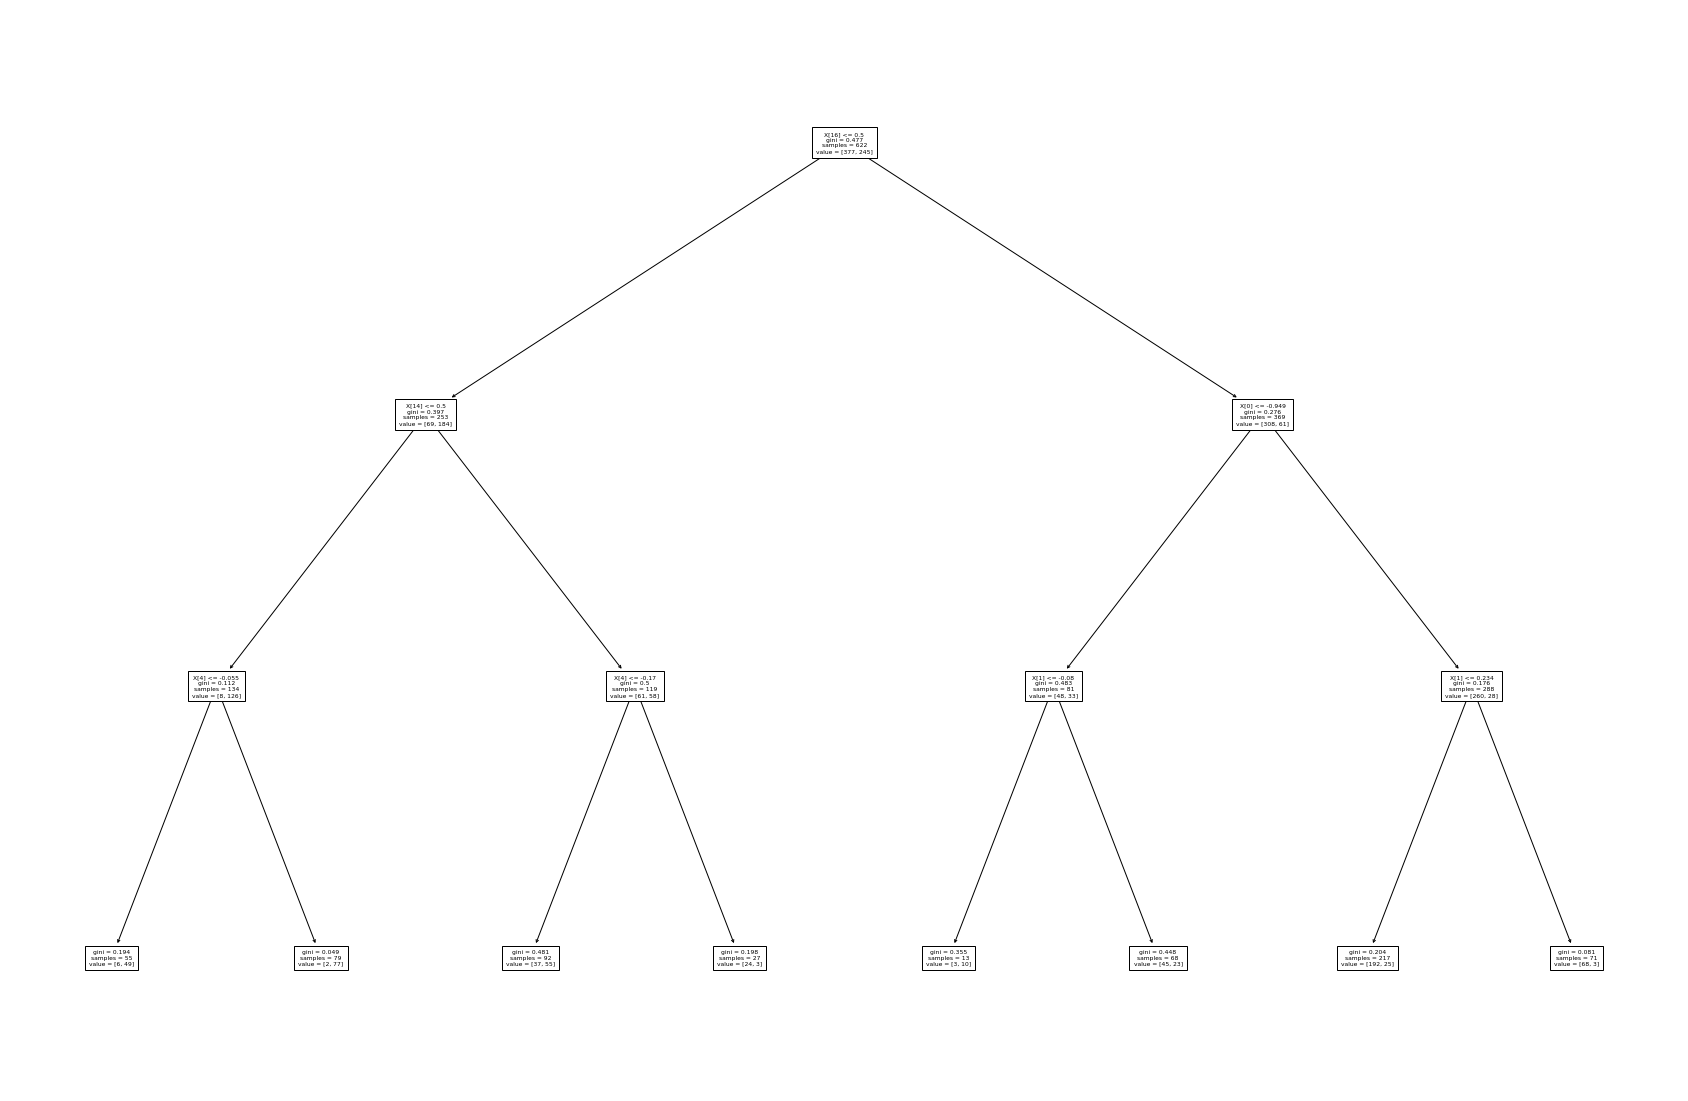

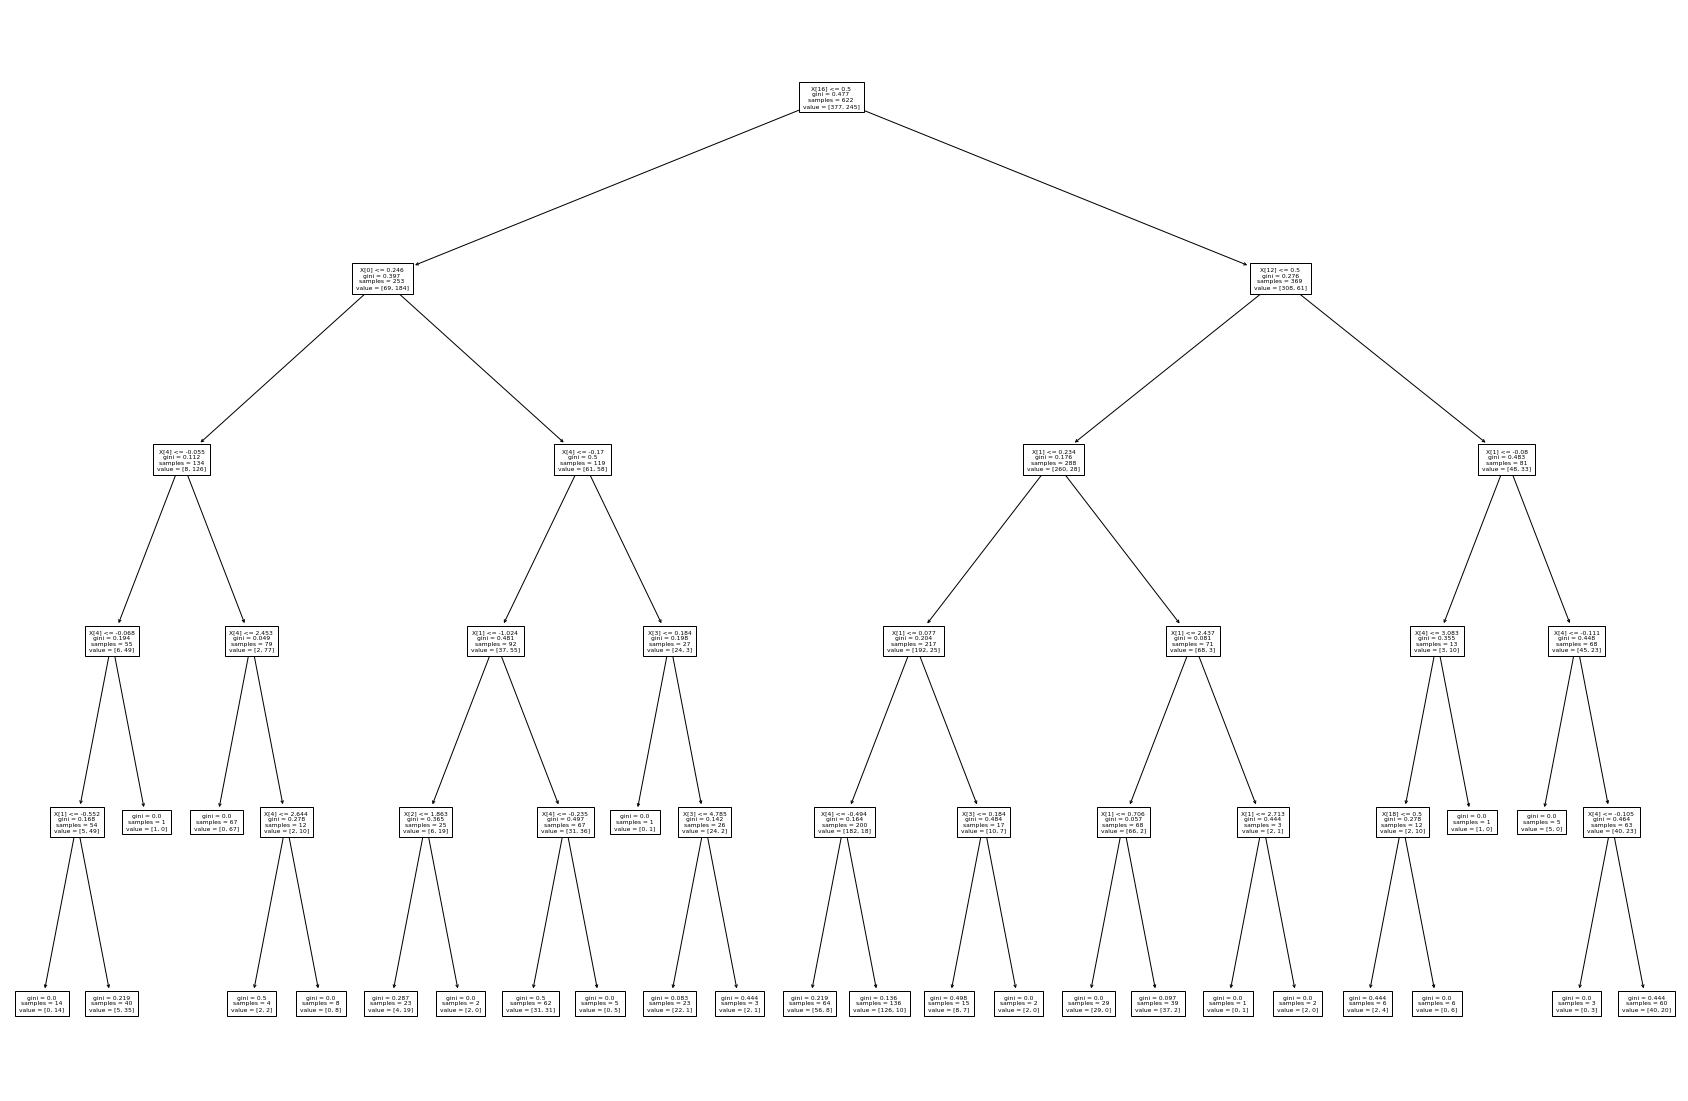

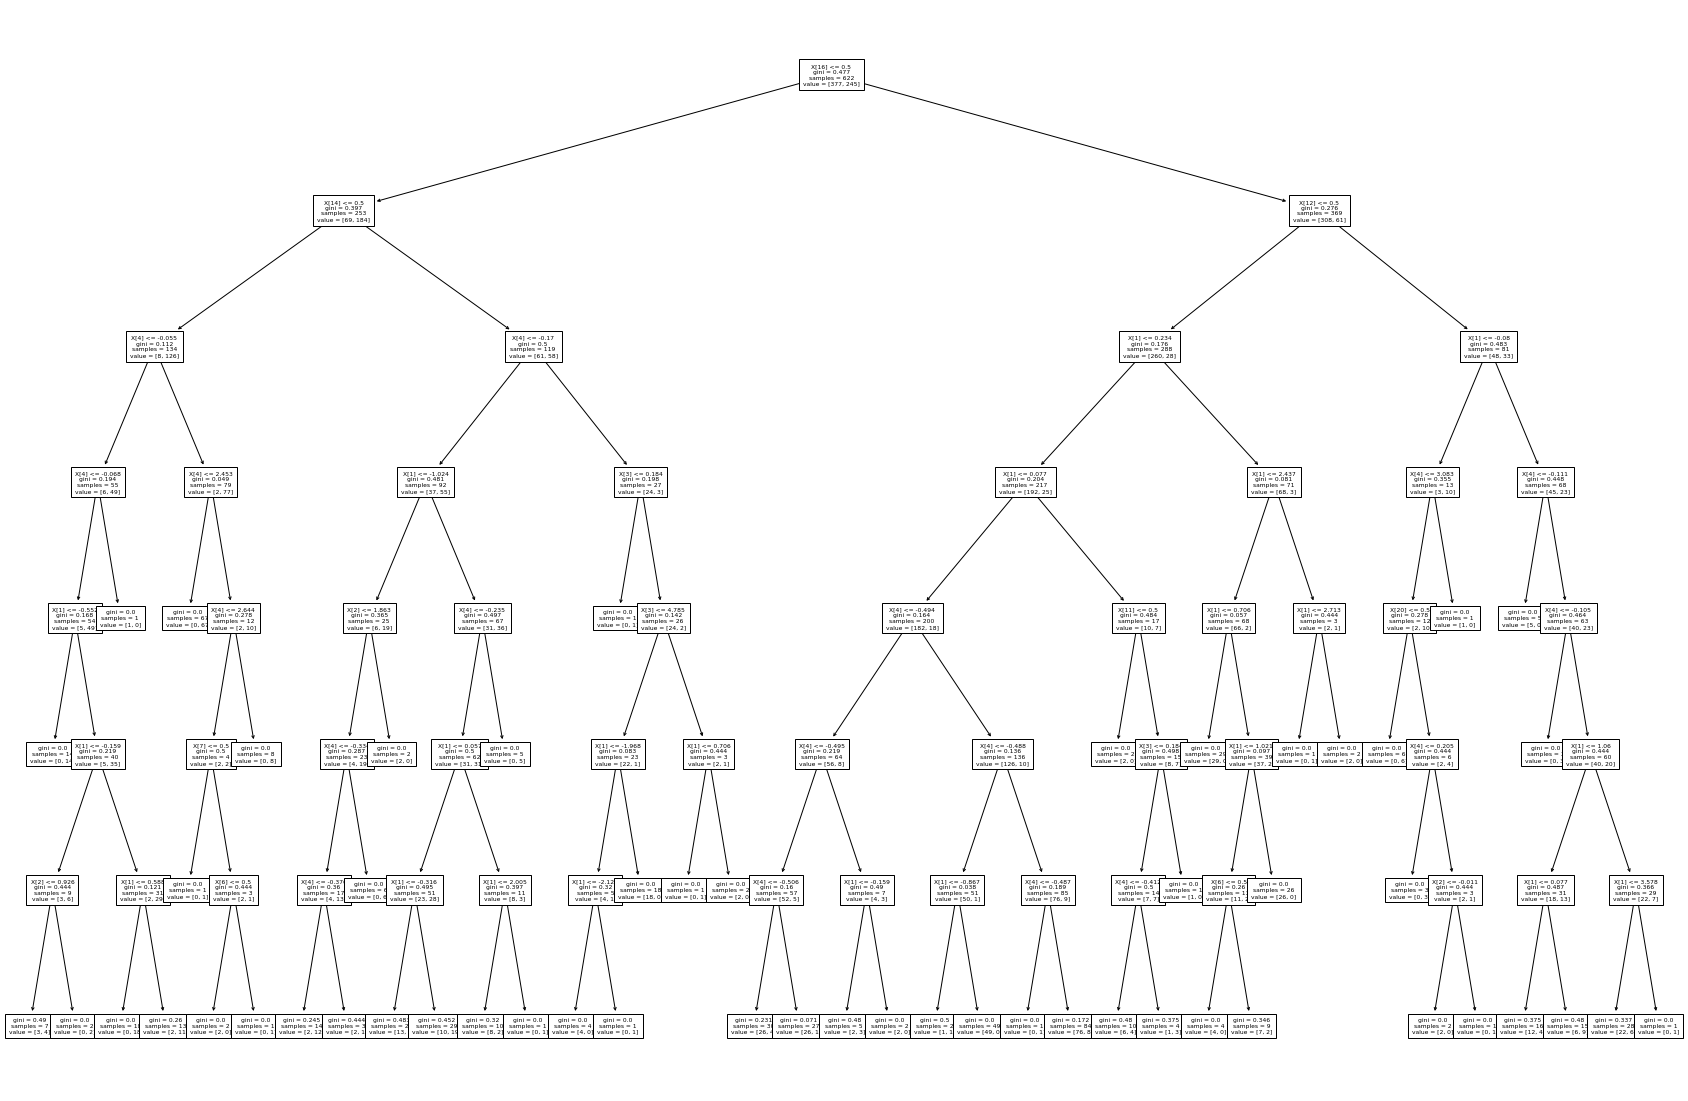

In [15]:
train_x = train.loc[:, train.columns != 'survived']
train_y = train.loc[:, train.columns == 'survived']
for i in range(3,8,2):
    clf = tree.DecisionTreeClassifier(max_depth = i)
    clf.fit(train_x, train_y)

    test_x = deepcopy(test.loc[:, test.columns != 'survived'])
    test_y = deepcopy(test.loc[:, test.columns == 'survived'])
    validate_x = deepcopy(validate.loc[:, validate.columns != 'survived'])
    validate_y = deepcopy(validate.loc[:, validate.columns == 'survived'])

    print('train  ('+str(i)+f' depth) = {clf.score(train_x, train_y)}')
    print('test  ('+str(i)+f' depth) = {clf.score(test_x, test_y)}')
    print('validate  ('+str(i)+f' depth) = {clf.score(validate_x, validate_y)}\n')

    plt.figure(figsize=(30,20))
    tree.plot_tree(clf, fontsize=6)
    plt.savefig('tree_high_dpi'+str(i), dpi=100) 

# Add noise

In [16]:
noise_train = deepcopy(train)
for i in columns_num:
    noise = np.random.uniform(-0.1,0.1, len(train[i]))
    #print(noise_train[i] - (noise_train[i]-noise))
    noise_train[i] += noise

train  (3 depth) = 0.8231511254019293
test  (3 depth) = 0.7985074626865671
validate  (3 depth) = 0.8421052631578947

train  (5 depth) = 0.8263665594855305
test  (5 depth) = 0.7611940298507462
validate  (5 depth) = 0.8421052631578947

train  (7 depth) = 0.8392282958199357
test  (7 depth) = 0.7761194029850746
validate  (7 depth) = 0.8345864661654135



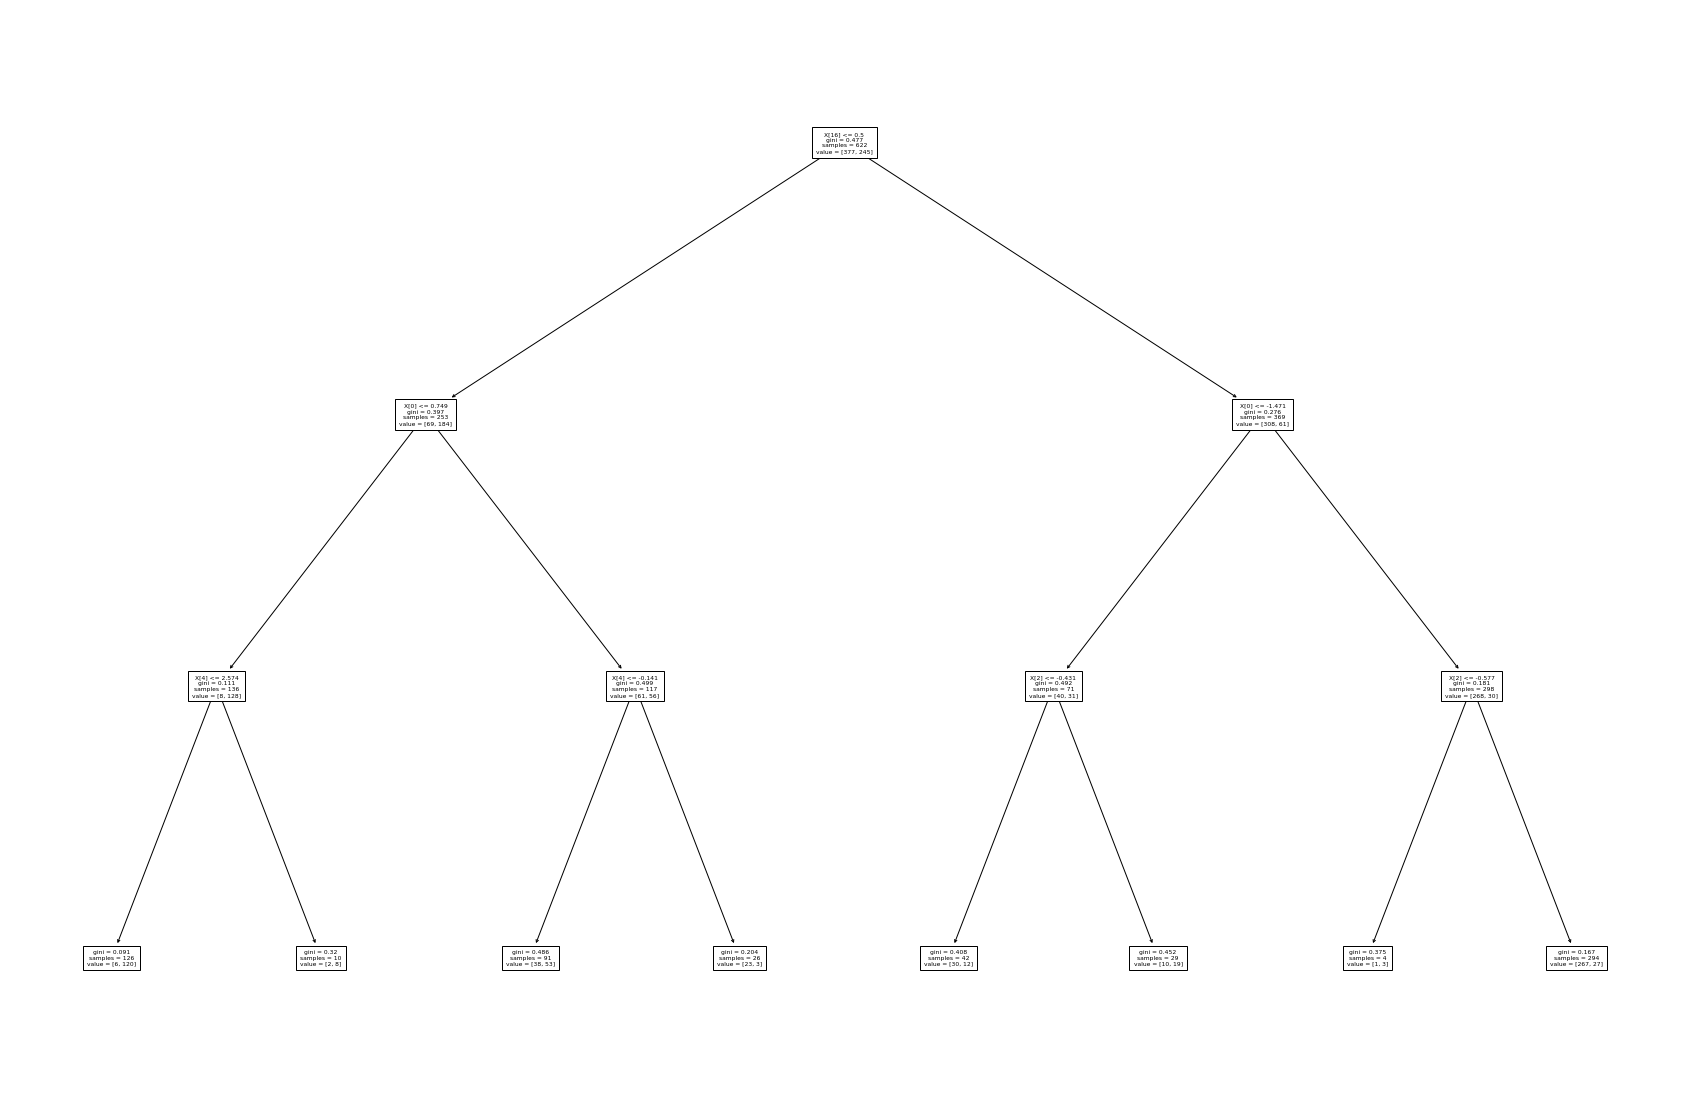

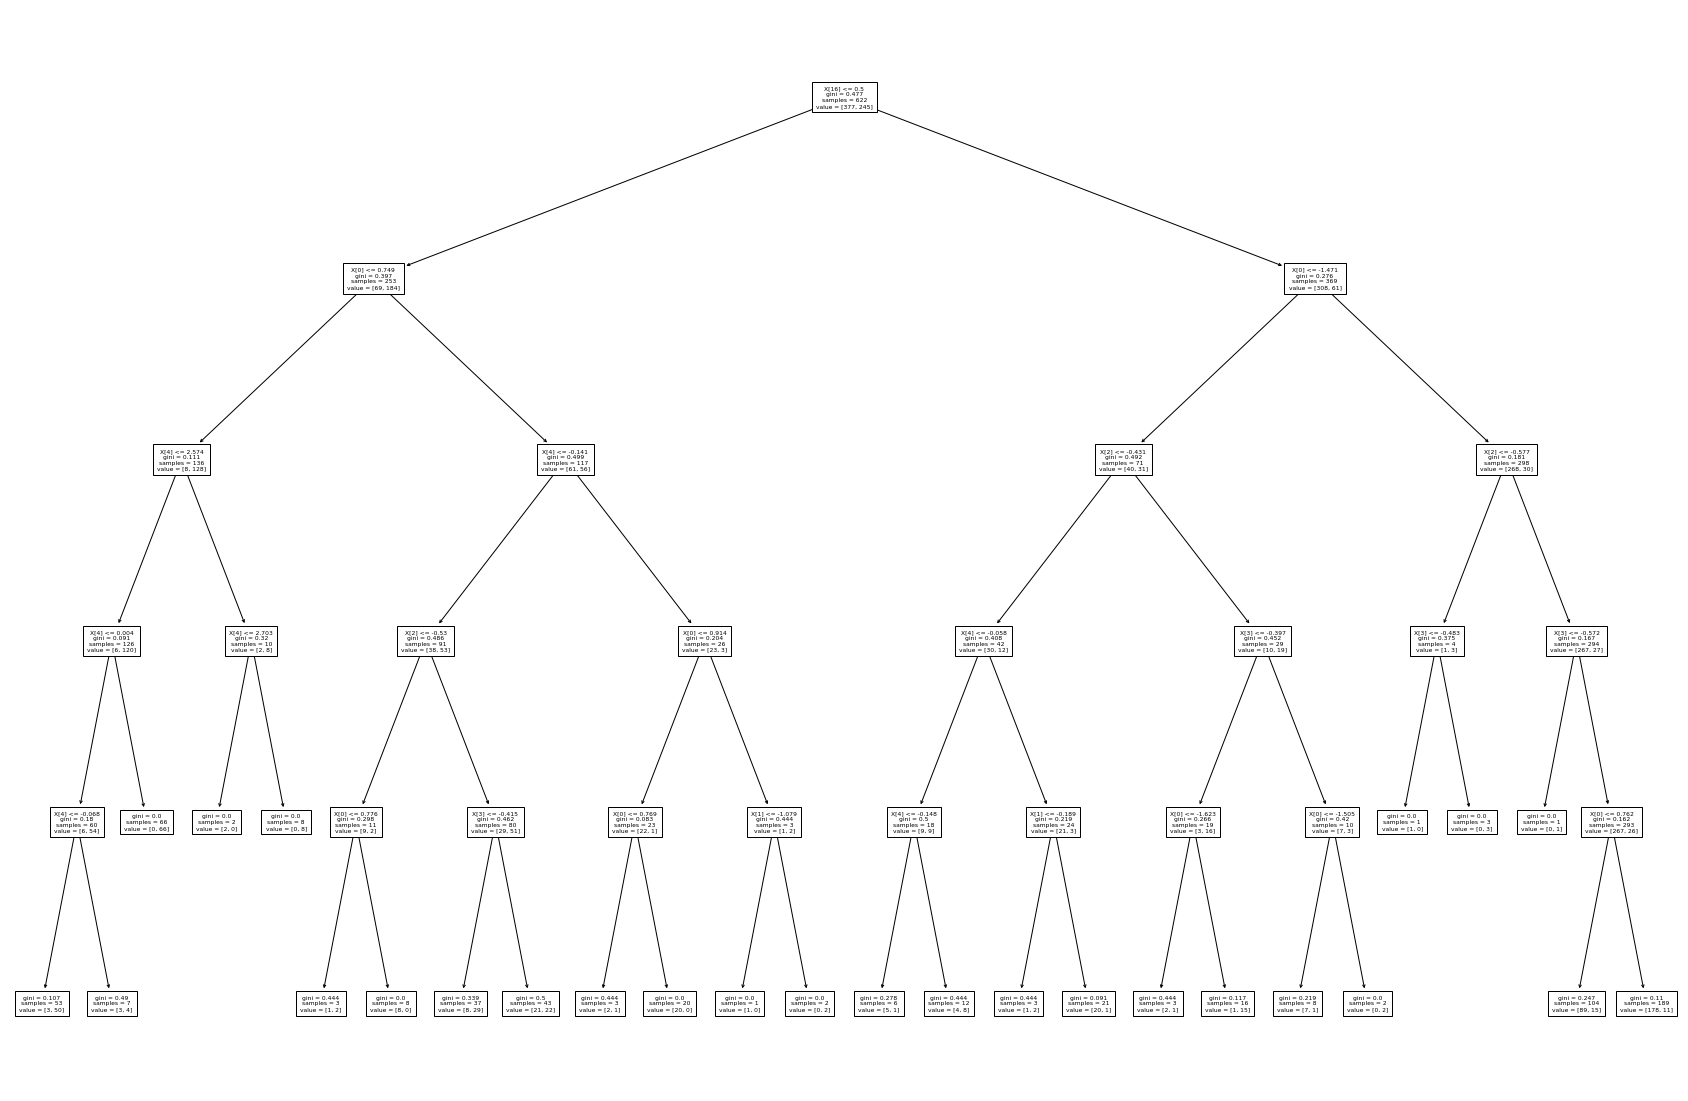

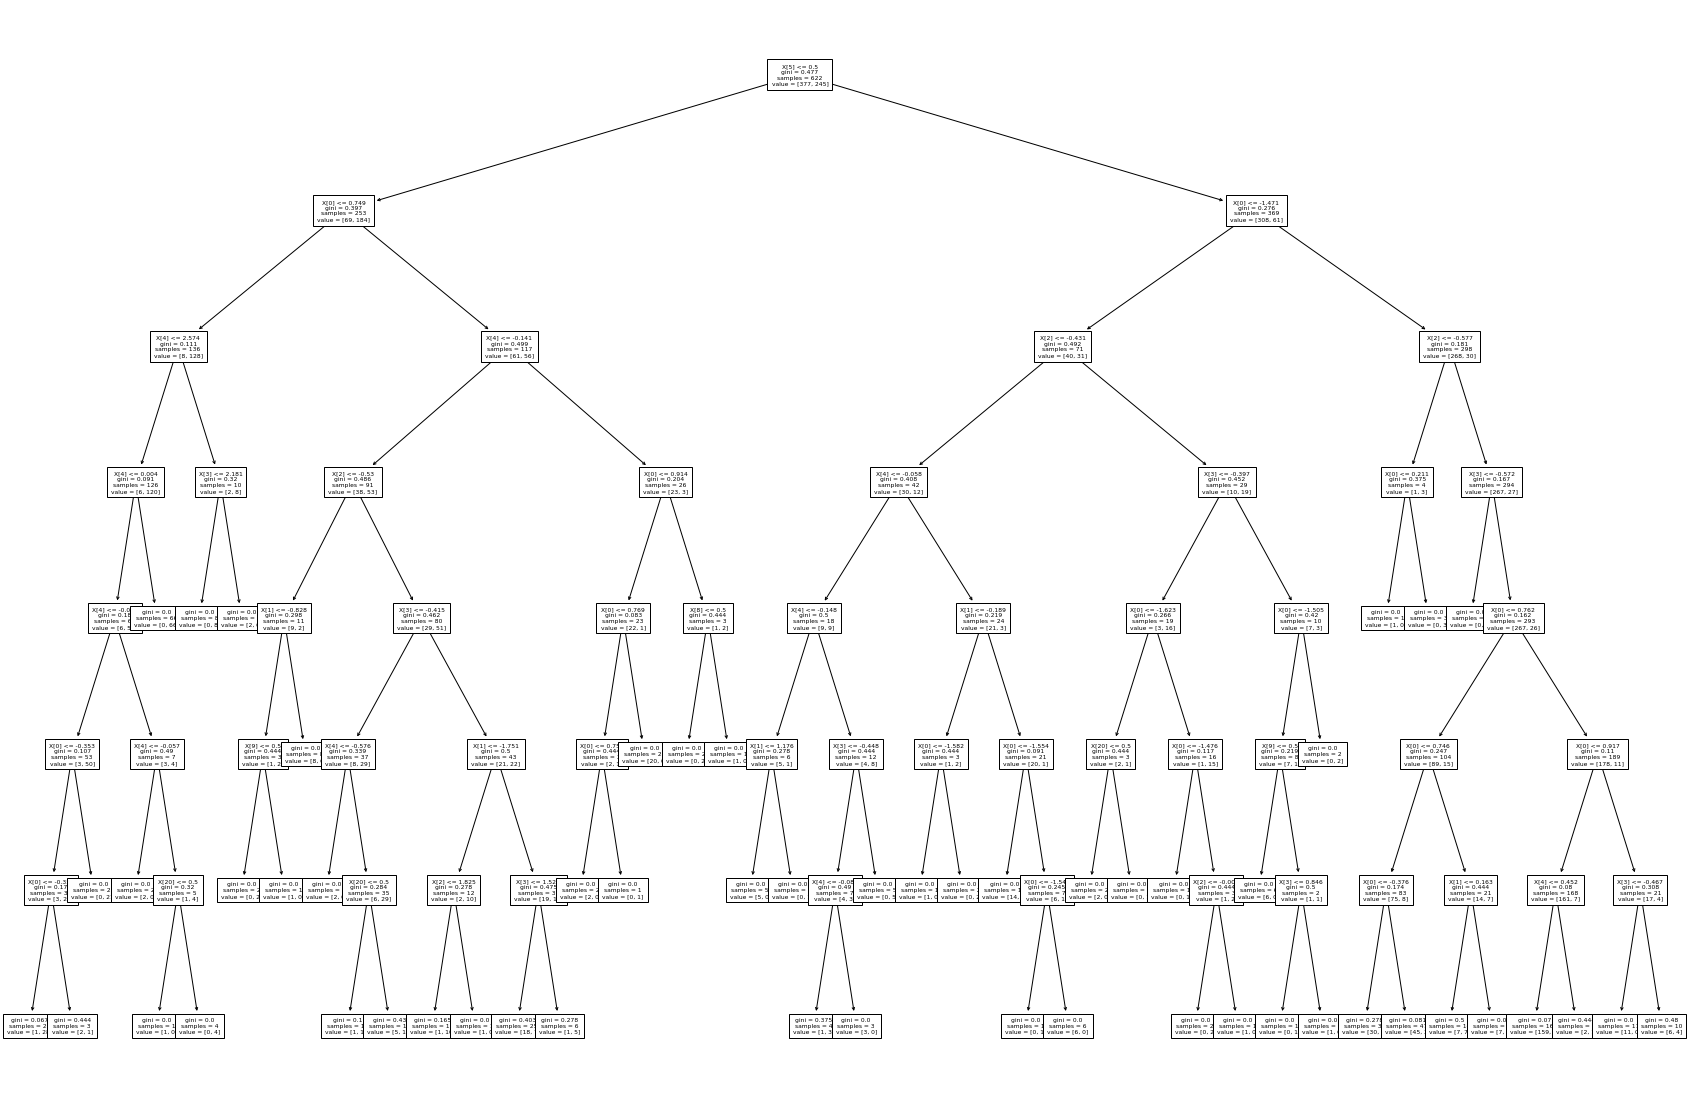

In [17]:
noise_train_x = deepcopy(noise_train.loc[:, noise_train.columns != 'survived'])
noise_train_y = deepcopy(noise_train.loc[:, noise_train.columns == 'survived'])
for i in range(3,8,2):
    clf = tree.DecisionTreeClassifier(max_depth = i)
    clf.fit(noise_train_x, train_y)

    print('train  ('+str(i)+f' depth) = {clf.score(train_x, train_y)}')
    print('test  ('+str(i)+f' depth) = {clf.score(test_x, test_y)}')
    print('validate  ('+str(i)+f' depth) = {clf.score(validate_x, validate_y)}\n')

    plt.figure(figsize=(30,20))
    tree.plot_tree(clf, fontsize=6)
    plt.savefig('tree_high_dpi'+str(i), dpi=100)

# PCA

In [18]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)


def plot_pca(df, col_1, col_2, pca):
    for length, vector in zip(pca.explained_variance_, pca.components_):
        v = vector * 3 * np.sqrt(length)
        draw_vector(pca.mean_, pca.mean_ + v)
    plt.scatter(df[col_1], df[col_2], alpha=0.2)
    plt.xlabel(col_1)
    plt.ylabel(col_2)
    plt.axis('equal')
    plt.show()
    print(f'Explained variance = {pca.explained_variance_ratio_}')
    print(f'Components = {pca.components_}')
    print(f'Mean = {pca.mean_}')


In [19]:
norm = copy(train[['age', 'fare']])
pca = PCA(0.95).fit(norm)
plot_pca(norm, 'age', 'fare', pca)
components = pca.transform(norm)
norm_filtered = pca.inverse_transform(components)
norm_restored = copy(train)

norm_restored['age'] = norm_filtered.T[0]
norm_restored['fare'] = norm_filtered.T[1]

Explained variance = [0.55323135 0.44676865]
Components = [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
Mean = [-8.56763749e-18  7.21109489e-16]


In [20]:
noisy = copy(noise_train[['age', 'fare']])
pca = PCA(0.95).fit(noisy)
plot_pca(noisy, 'age', 'fare', pca)
components = pca.transform(noisy)
noisy_filtered = pca.inverse_transform(components)
noisy_restored = copy(train)

noisy_restored['age'] = noisy_filtered.T[0]
noisy_restored['fare'] = noisy_filtered.T[1]

Explained variance = [0.55318668 0.44681332]
Components = [[ 0.70727246  0.70694106]
 [-0.70694106  0.70727246]]
Mean = [-0.00017046 -0.00313042]


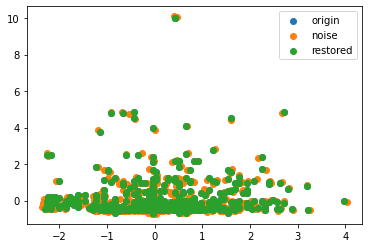

In [21]:
plt.scatter(train['age'],train['fare'], label='origin',alpha=1)
plt.scatter(noise_train['age'],noise_train['fare'], label='noise',alpha=1)
plt.scatter(norm_restored['age'],norm_restored['fare'], label='restored',alpha=1)
plt.legend()
plt.show()

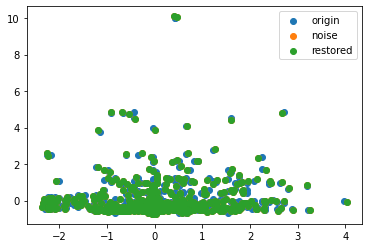

In [22]:
plt.scatter(train['age'],train['fare'], label='origin',alpha=1)
plt.scatter(noise_train['age'],noise_train['fare'], label='noise',alpha=1)
plt.scatter(noisy_restored['age'],noisy_restored['fare'], label='restored',alpha=1)
plt.legend()
plt.show()

train  (3 depth) = 0.8327974276527331
test  (3 depth) = 0.7910447761194029
validate  (3 depth) = 0.8345864661654135

train  (5 depth) = 0.8617363344051447
test  (5 depth) = 0.7835820895522388
validate  (5 depth) = 0.8345864661654135

train  (7 depth) = 0.8971061093247589
test  (7 depth) = 0.7761194029850746
validate  (7 depth) = 0.8345864661654135



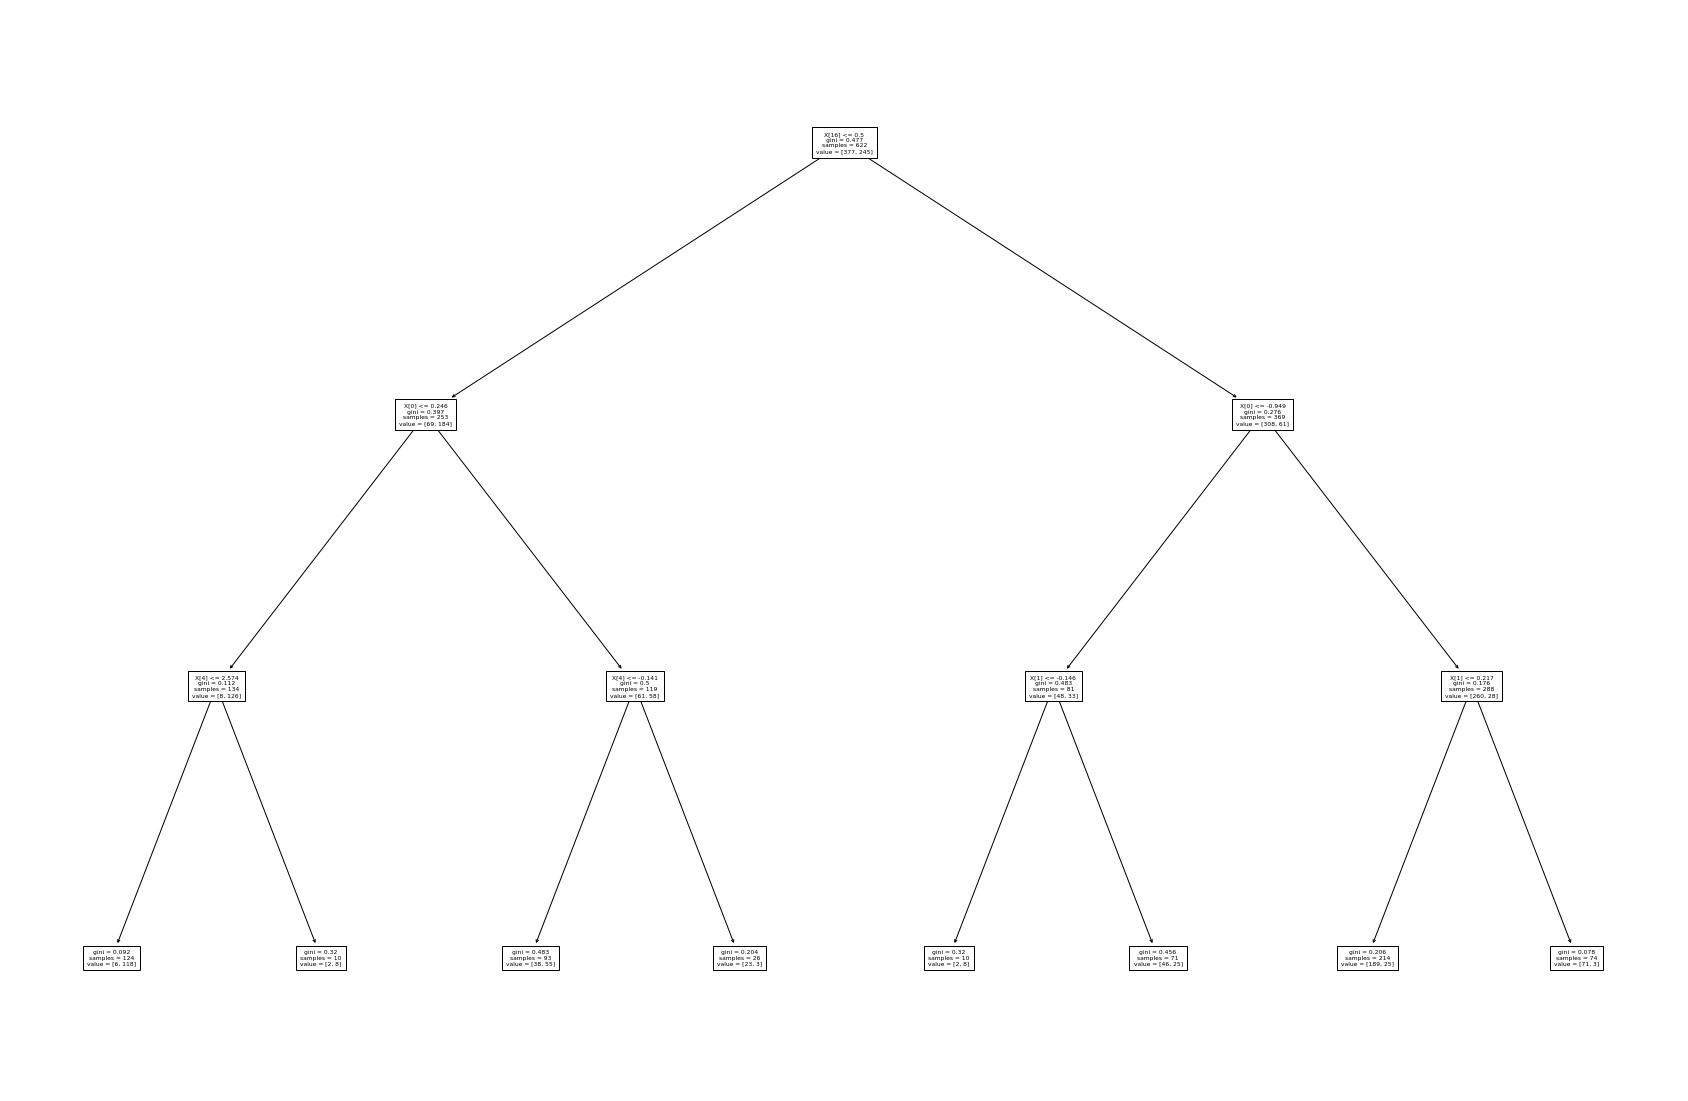

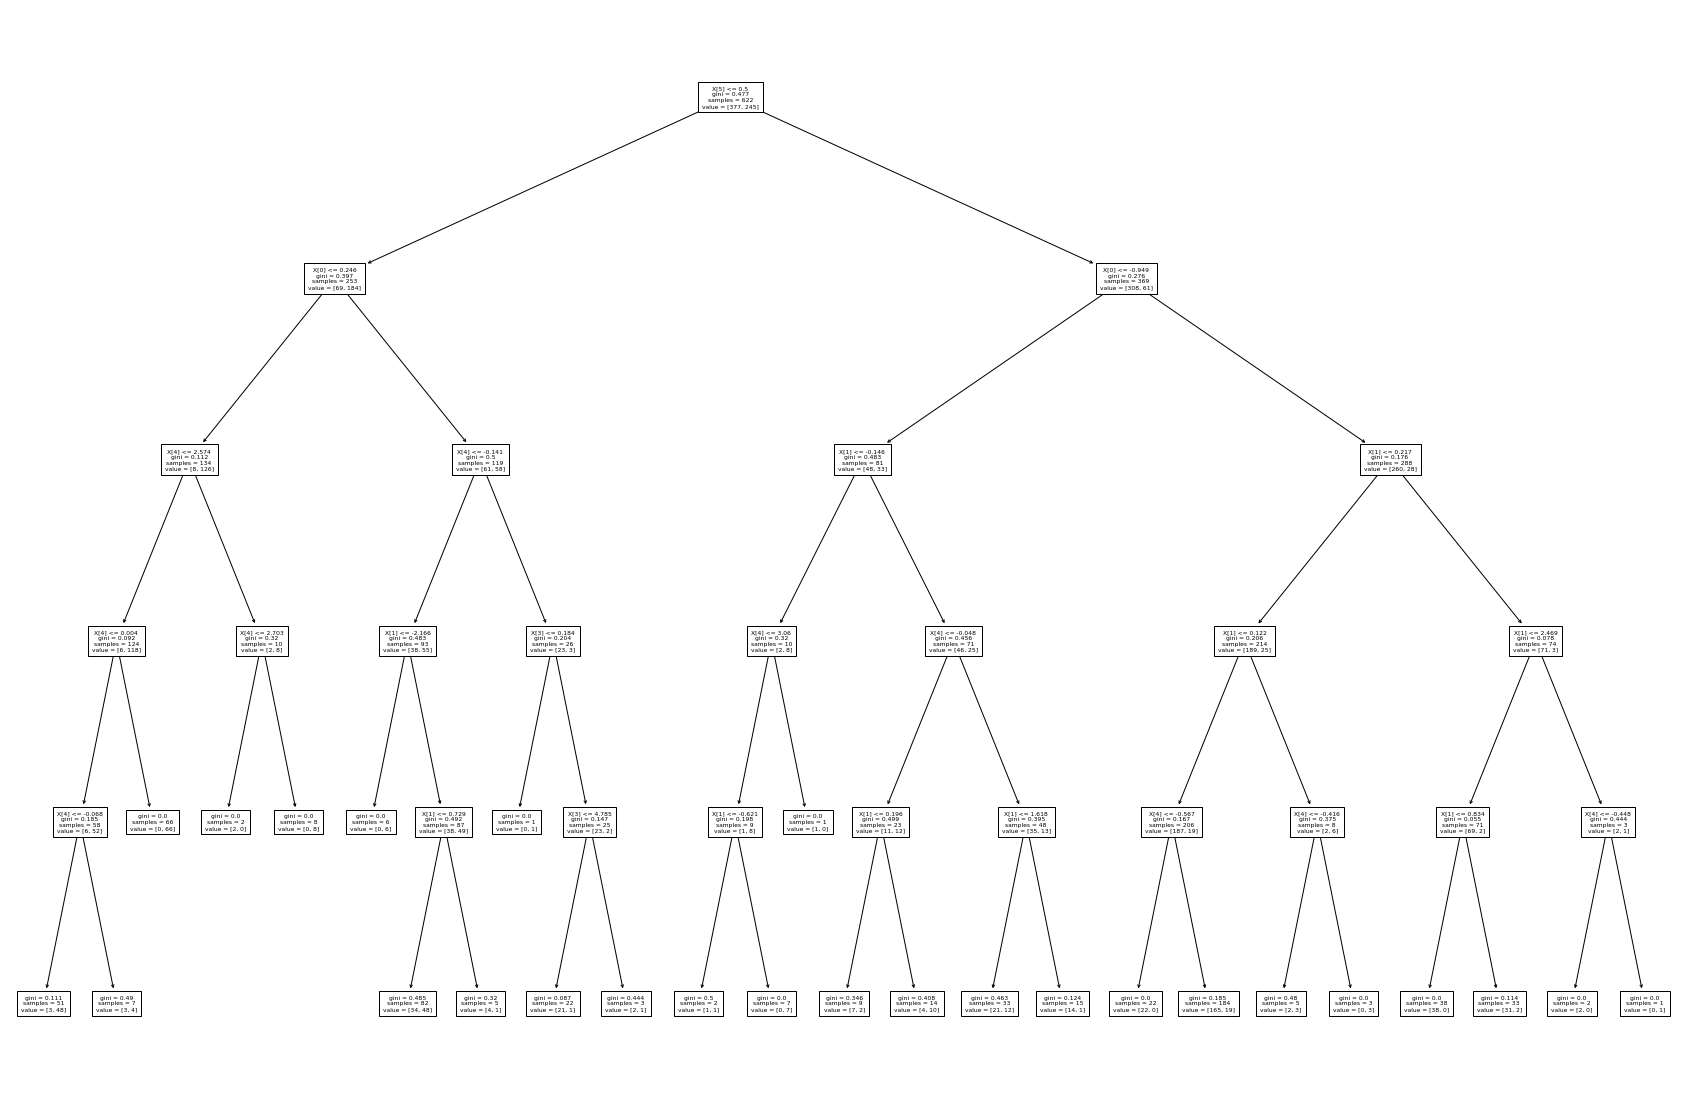

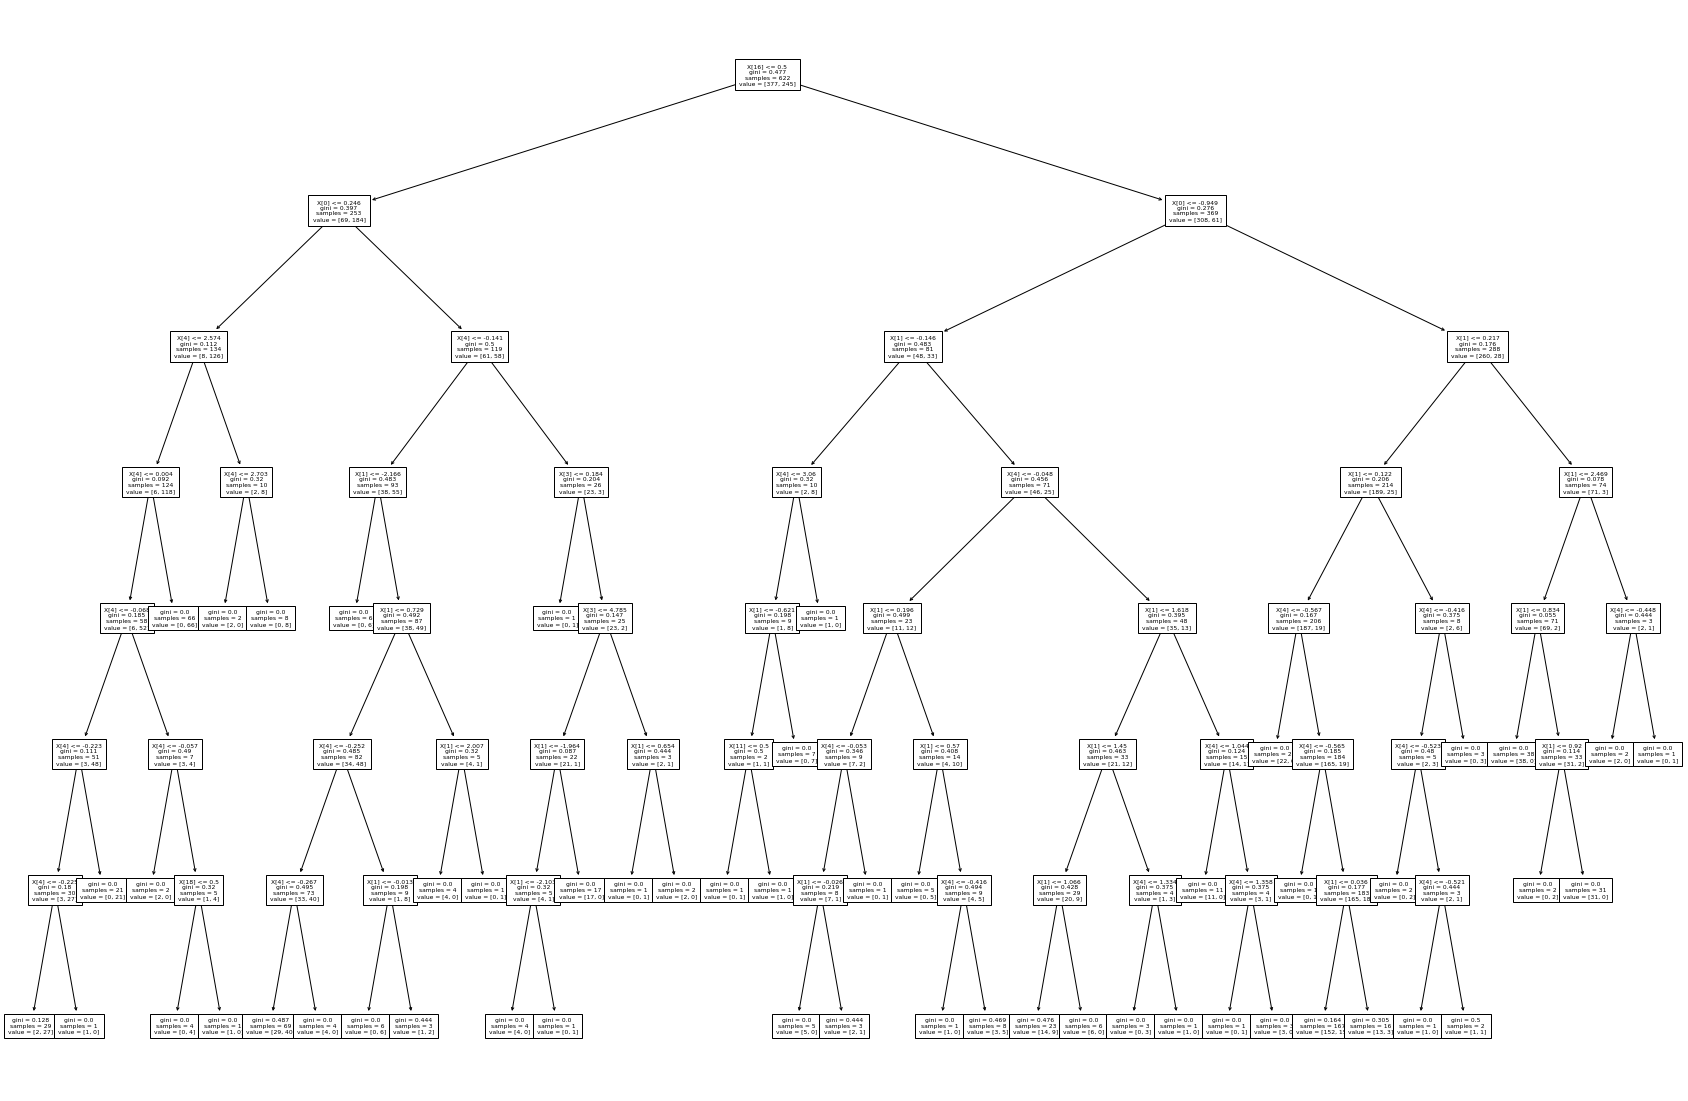

In [23]:
restored_train_x = deepcopy(noisy_restored.loc[:, noisy_restored.columns != 'survived'])
restored_train_y = deepcopy(noisy_restored.loc[:, noisy_restored.columns == 'survived'])
for i in range(3,8,2):
    clf = tree.DecisionTreeClassifier(max_depth = i)
    clf.fit(restored_train_x, train_y)

    print('train  ('+str(i)+f' depth) = {clf.score(restored_train_x, train_y)}')
    print('test  ('+str(i)+f' depth) = {clf.score(test_x, test_y)}')
    print('validate  ('+str(i)+f' depth) = {clf.score(validate_x, validate_y)}\n')

    plt.figure(figsize=(30,20))
    tree.plot_tree(clf, fontsize=6)
    plt.savefig('tree_high_dpi'+str(i), dpi=100)

In [24]:
noisy_full = noise_train[['pclass','age','sibsp','parch','fare']]
pca = PCA(0.95).fit(noisy_full)
components = pca.transform(noisy_full)
noisy_full_filtered = pca.inverse_transform(components)
noisy_full_restored = copy(train)

noisy_full_restored['pclass'] = noisy_full_filtered.T[0]
noisy_full_restored['age'] = noisy_full_filtered.T[1]
noisy_full_restored['sibsp'] = noisy_full_filtered.T[2]
noisy_full_restored['parch'] = noisy_full_filtered.T[3]
noisy_full_restored['fare'] = noisy_full_filtered.T[4]

first train score (3 depth) = 0.8408360128617364
first test score (3 depth) = 0.7985074626865671
first validate score (3 depth) = 0.8421052631578947

first train score (5 depth) = 0.882636655948553
first test score (5 depth) = 0.7611940298507462
first validate score (5 depth) = 0.8421052631578947

first train score (7 depth) = 0.9292604501607717
first test score (7 depth) = 0.7910447761194029
first validate score (7 depth) = 0.8195488721804511



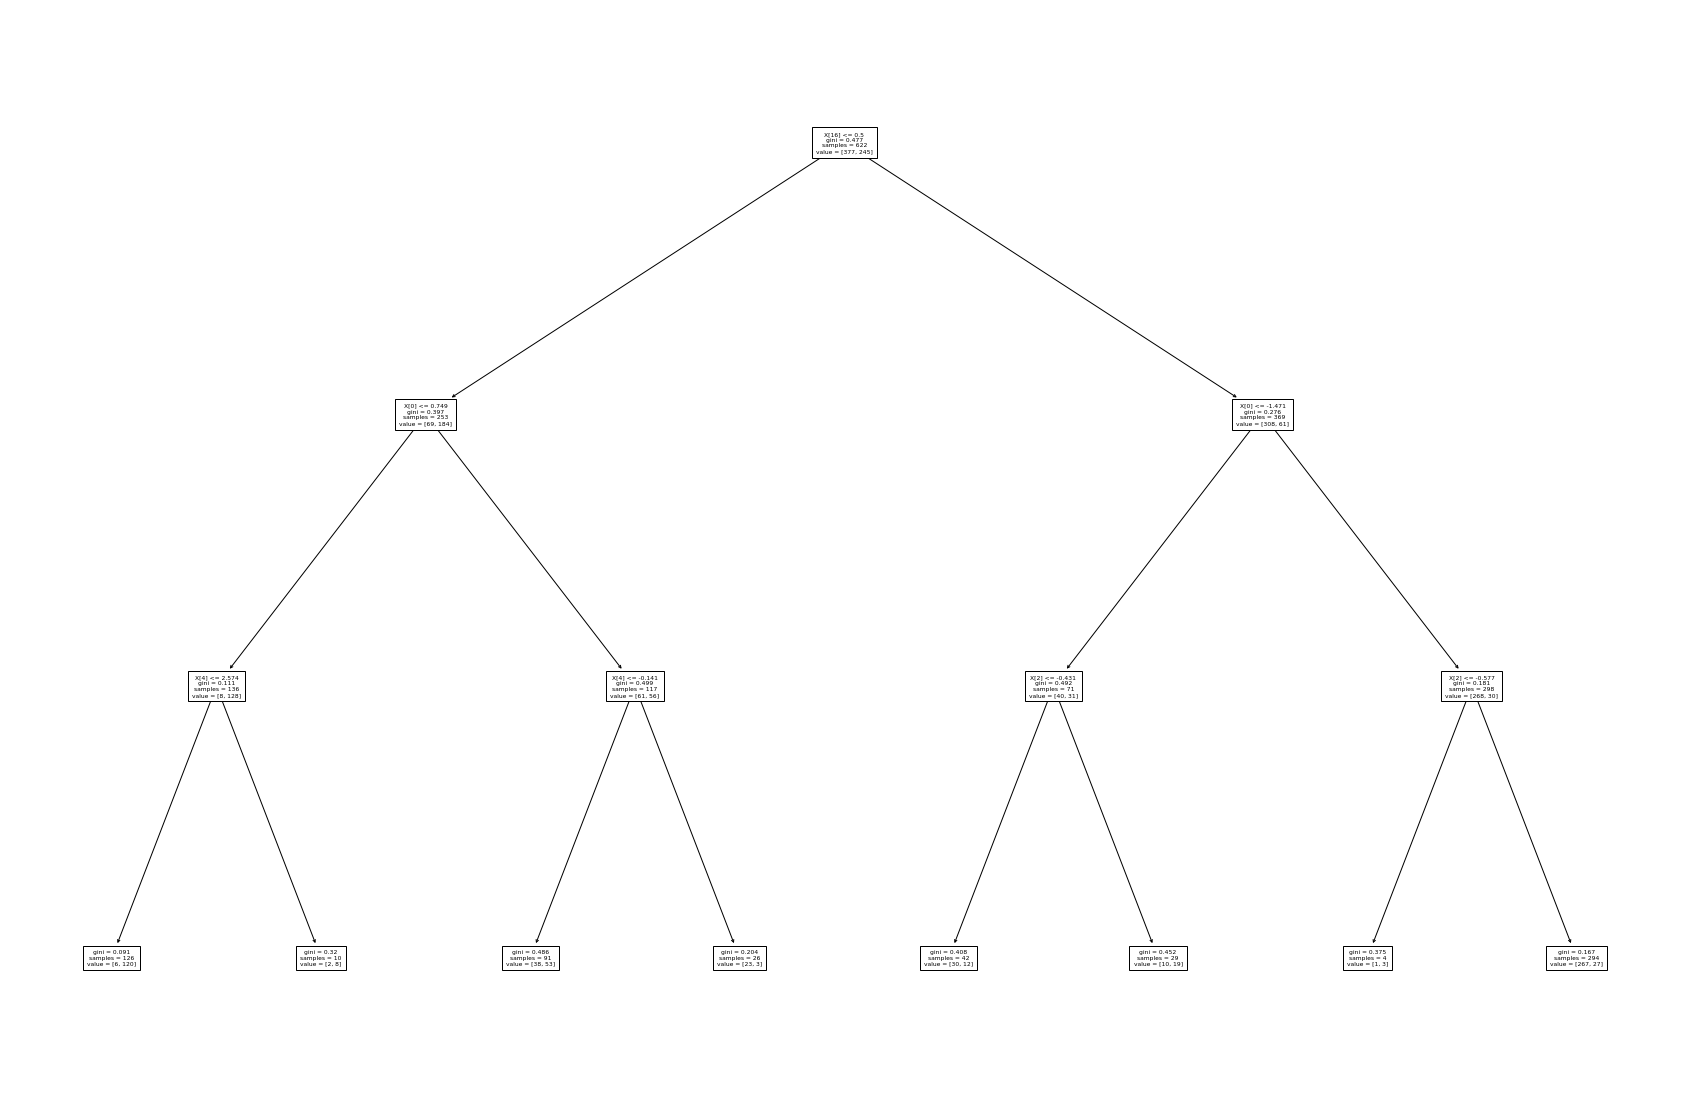

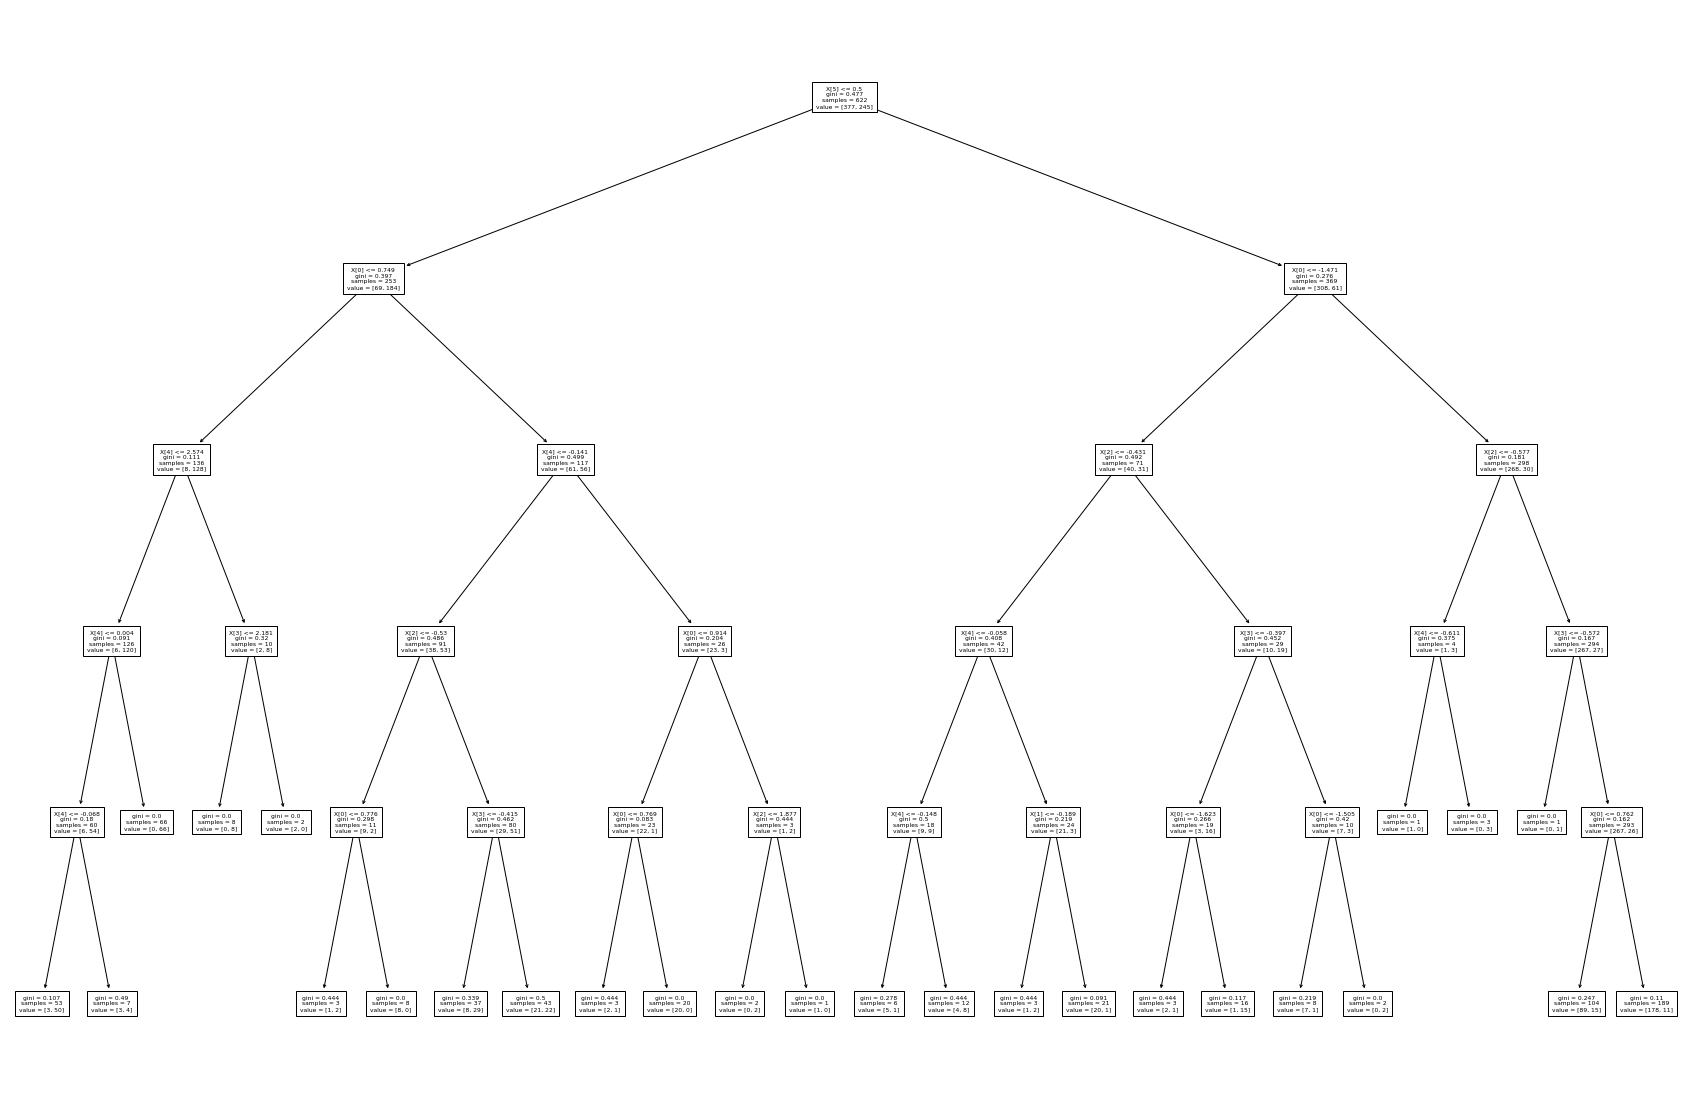

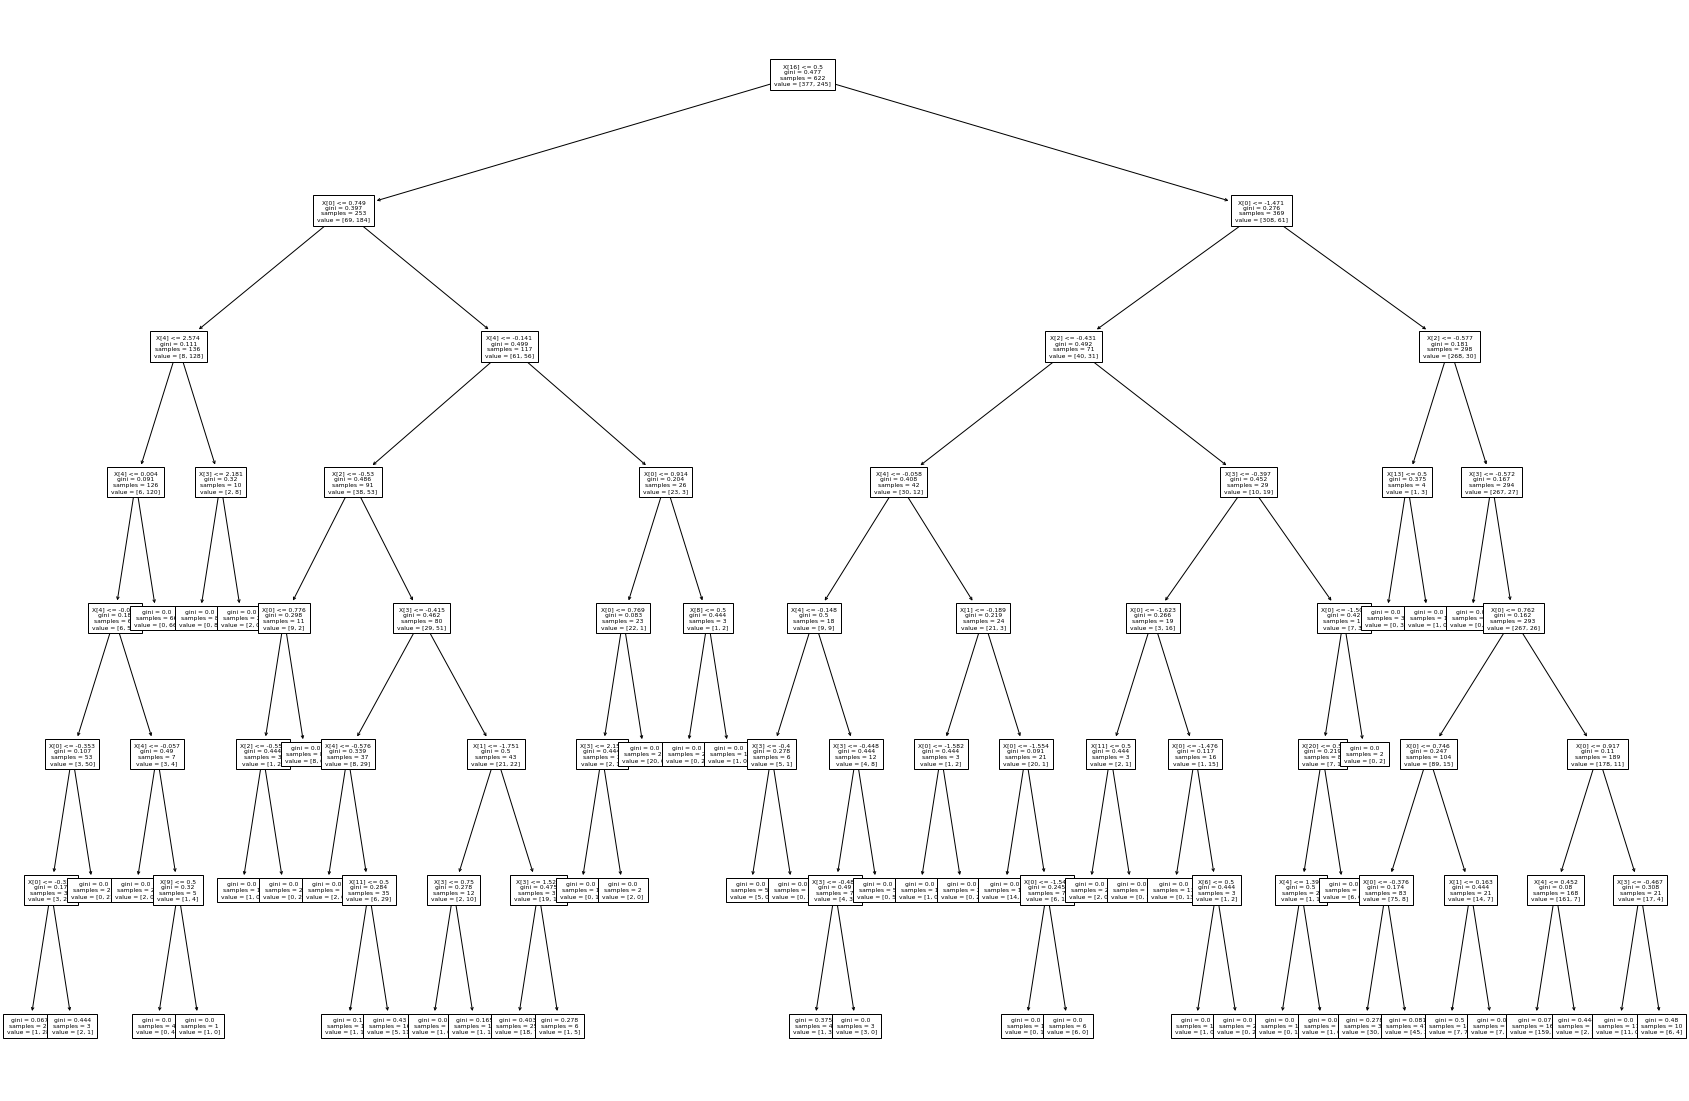

In [25]:
restored_full_train_x = copy(noisy_full_restored.loc[:, noisy_full_restored.columns != 'survived'])
restored_full_train_y = copy(noisy_full_restored.loc[:, noisy_full_restored.columns == 'survived'])
for i in range(3,8,2):
    clf = tree.DecisionTreeClassifier(max_depth = i)
    clf.fit(restored_full_train_x, train_y)
    
    print('first train score ('+str(i)+f' depth) = {clf.score(restored_full_train_x, train_y)}')
    print('first test score ('+str(i)+f' depth) = {clf.score(test_x, test_y)}')
    print('first validate score ('+str(i)+f' depth) = {clf.score(validate_x, validate_y)}\n')

    plt.figure(figsize=(30,20))
    tree.plot_tree(clf, fontsize=6)
    plt.savefig('tree_high_dpi'+str(i), dpi=100)